In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from scipy import stats

from definitions import TISSUES

# General notebook

This notebook contains the code used to find some key information written  in the paper, as well as the plots used throughout.

## Communities description - boxplots

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import numpy as np
#import pandas as pd
#from scipy import stats

from definitions import TISSUES

In [3]:
TISSUES = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary',
           'Artery_Tibial', 'Brain_Amygdala', 'Brain_Anterior_cingulate', 'Brain_Caudate', 'Brain_Cerebellar',
           'Brain_Cerebellum', 'Brain_Cortex', 'Brain_Frontal_Cortex', 'Brain_Hippocampus', 'Brain_Hypothalamus',
           'Brain_Nucleus', 'Brain_Putamen', 'Brain_Spinal_cord', 'Brain_Substantia_nigra', 'Breast_Mammary_Tissue',
           'Cells_Cultured', 'Cells_EBV', 'Colon_Sigmoid', 'Colon_Transverse', 'Esophagus_Gastro', 'Esophagus_Mucosa',
           'Esophagus_Muscularis', 'Heart_Atrial', 'Heart_L_Vent', 'Kidney_Cortex', 'Liver', 'Lung', 'Minor_Salivary',
           'Muscle_Skeletal', 'Nerve_Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Skin_Not_Sun_Epsd',
           'Skin_Sun_Epsd', 'Small_Intestine', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina',
           'Whole_Blood']
TISSUES_SUBSET = ['Brain_Amygdala', 'Brain_Frontal_Cortex', 'Cells_EBV', 'Esophagus_Mucosa', 'Skin_Not_Sun_Epsd', 
                  'Small_Intestine', 'Stomach', 'Whole_Blood']
TISSUES_latex = ['Adipose Subcutaneous', 'Adipose Visceral Omentum', 'Adrenal Gland', 'Artery Aorta', 'Artery Coronary',
           'Artery Tibial', 'Brain Amygdala', 'Brain Anterior cingulate', 'Brain Caudate', 'Brain Cerebellar',
           'Brain Cerebellum', 'Brain Cortex', 'Brain Frontal Cortex', 'Brain Hippocampus', 'Brain Hypothalamus',
           'Brain Nucleus', 'Brain Putamen', 'Brain Spinal cord', 'Brain Substantia nigra', 'Breast Mammary Tissue',
           'Cells Cultured', 'Cells EBV', 'Colon Sigmoid', 'Colon Transverse', 'Esophagus Gastro', 'Esophagus Mucosa',
           'Esophagus Muscularis', 'Heart Atrial', 'Heart L Vent', 'Kidney Cortex', 'Liver', 'Lung', 'Minor Salivary',
           'Muscle Skeletal', 'Nerve Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Skin Not Sun Epsd',
           'Skin Sun Epsd', 'Small Intestine', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina',
           'Whole Blood']

In [4]:
def plot_distribution_boxplot(tissues, figsize, fig_name=None):
    all_distributions = []
    fig = plt.figure(1, figsize=figsize)
    ax = fig.add_subplot(111)

    for tissue in tissues[::-1]:
        m, _ = pickle.load(open('results/louvain_modules_' + tissue + '.pkl', 'rb'))

        uniq_arrs = np.unique(np.unique(m, return_counts=True)[1], return_counts=True)

        size_distribution = []
        for i in range(len(uniq_arrs[0])):
            size_tissue = uniq_arrs[0][i]
            number_for_size = uniq_arrs[1][i]

            if size_tissue <= 1:
                continue

            size_distribution.extend([size_tissue] * number_for_size)
        all_distributions.append(size_distribution)

    _ = ax.boxplot(all_distributions, vert=False, showmeans=True, meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick'))
    _ = ax.set_yticklabels([t.replace('_', ' ') for t in tissues[::-1]], fontsize=20)

    ax.set_ylabel('Tissue', size=35, fontweight='bold')
    ax.set_xlabel('Community size', size=35, fontweight='bold')

    plt.tight_layout()
    plt.xticks(size=30)
    plt.yticks(size=30)
    plt.tight_layout()
    plt.savefig(f'figures/{fig_name}.pdf')#, bbox_inches = 'tight', pad_inches = 0)
    #plt.show()
    plt.close()

In [5]:
plot_distribution_boxplot(TISSUES_SUBSET, (20,6), 'tissue_subset_distribution')

In [6]:
plot_distribution_boxplot(TISSUES, (20,25), 'all_tissues_distribution')

In [39]:
# It calculates the Median Absolute Deviation
def mad(arr):
    return np.median(np.abs(arr - np.median(arr)))

In [48]:
print('\\LTcapwidth=\\textwidth')
print('\\begin{longtable}{C{4cm}C{2cm}C{2cm}C{2cm}C{1.5cm}C{1.5cm}C{1.5cm}C{1cm}C{0.5cm}}')
print('\\caption{Information about communities in each tissue. Statistics (i.e., mean, std, median, and MAD) refer to the distribution of community sizes for each tissue}\\\\')
print('\\toprule')
print('Tissue\t\t\t&\tNumber of genes without a community\t&\tNumber of communities with size below 4\t&\tTotal number of communities\t&\tMean\t&\tStd\t&\tMedian\t&\tMAD\t\\\\')

print('\\midrule')
print('\\endhead')
print('\\midrule')
print('\\multicolumn{2}{r}{{Continued on next page}} \\\\')
print('\\midrule')
print('\\endfoot')
print()
print('\\bottomrule')
print('\\endlastfoot')

for ind, tissue in enumerate(TISSUES):
    m, _ = pickle.load(open('results/louvain_modules_' + tissue + '.pkl', 'rb'))

    uniq_arrs = np.unique(np.unique(m, return_counts=True)[1], return_counts=True)

    size_distribution = []
    genes_out = 0 # disconnected from the co-correlation network
    number_below_4 = 0
    other_coms = 0
    
    for i in range(len(uniq_arrs[0])):
        size_tissue = uniq_arrs[0][i]
        number_for_size = uniq_arrs[1][i]

        if size_tissue <= 1:
            genes_out += number_for_size
            continue
        elif size_tissue < 4:
            number_below_4 += number_for_size
        else:
            other_coms += number_for_size
            

        size_distribution.extend([size_tissue] * number_for_size)
    #all_distributions.append(size_distribution)
    print('\t&\t'.join([TISSUES_latex[ind], 
                        str(genes_out),
                        str(number_below_4),
                        str(number_below_4 + other_coms),
                        str(round(np.mean(size_distribution), 3)),
                        str(round(np.std(size_distribution), 4)),
                        str(np.median(size_distribution)),
                        str(mad(size_distribution))]),
          end=' \\\\\n')

print('\\end{longtable}')

\LTcapwidth=\textwidth
\begin{longtable}{C{4cm}C{2cm}C{2cm}C{2cm}C{1.5cm}C{1.5cm}C{1.5cm}C{1cm}C{0.5cm}}
\caption{Information about communities in each tissue. Statistics (i.e., mean, std, median, and MAD) refer to the distribution of community sizes for each tissue}\\
\toprule
Tissue			&	Number of genes without a community	&	Number of communities with size below 4	&	Total number of communities	&	Mean	&	Std	&	Median	&	MAD	\\
\midrule
\endhead
\midrule
\multicolumn{2}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Adipose Subcutaneous	&	15770	&	69	&	84	&	3.167	&	2.6763	&	2.0	&	0.0 \\
Adipose Visceral Omentum	&	15730	&	62	&	91	&	4.055	&	4.2462	&	2.0	&	0.0 \\
Adrenal Gland	&	15260	&	93	&	125	&	4.648	&	7.0373	&	2.0	&	0.0 \\
Artery Aorta	&	15463	&	73	&	100	&	4.1	&	4.2837	&	2.0	&	0.0 \\
Artery Coronary	&	15490	&	80	&	112	&	5.286	&	8.2163	&	2.0	&	0.0 \\
Artery Tibial	&	15402	&	58	&	78	&	3.718	&	3.9545	&	2.0	&	0.0 \\
Brain Amygdala	&	15430	&	71	&	102	&	7.255	&	13.5

## Sample sizes

In [1]:
files = { 'Adipose_Subcutaneous' : 'data/Adipose_Subcutaneous.v8.normalized_expression.bed',
'Adipose_Visceral_Omentum' : 'data/Adipose_Visceral_Omentum.v8.normalized_expression.bed',
'Adrenal_Gland' : 'data/Adrenal_Gland.v8.normalized_expression.bed',
'Artery_Aorta' : 'data/Artery_Aorta.v8.normalized_expression.bed',
'Artery_Coronary' : 'data/Artery_Coronary.v8.normalized_expression.bed',
'Artery_Tibial' : 'data/Artery_Tibial.v8.normalized_expression.bed',
'Brain_Amygdala' : 'data/Brain_Amygdala.v8.normalized_expression.bed',
'Brain_Anterior_cingulate' : 'data/Brain_Anterior_cingulate_cortex_BA24.v8.normalized_expression.bed',
'Brain_Caudate' : 'data/Brain_Caudate_basal_ganglia.v8.normalized_expression.bed',
'Brain_Cerebellar' : 'data/Brain_Cerebellar_Hemisphere.v8.normalized_expression.bed',
'Brain_Cerebellum' : 'data/Brain_Cerebellum.v8.normalized_expression.bed',
'Brain_Cortex' : 'data/Brain_Cortex.v8.normalized_expression.bed',
'Brain_Frontal_Cortex' : 'data/Brain_Frontal_Cortex_BA9.v8.normalized_expression.bed',
'Brain_Hippocampus' : 'data/Brain_Hippocampus.v8.normalized_expression.bed',
'Brain_Hypothalamus' : 'data/Brain_Hypothalamus.v8.normalized_expression.bed',
'Brain_Nucleus' : 'data/Brain_Nucleus_accumbens_basal_ganglia.v8.normalized_expression.bed',
'Brain_Putamen' : 'data/Brain_Putamen_basal_ganglia.v8.normalized_expression.bed',
'Brain_Spinal_cord' : 'data/Brain_Spinal_cord_cervical_c-1.v8.normalized_expression.bed',
'Brain_Substantia_nigra' : 'data/Brain_Substantia_nigra.v8.normalized_expression.bed',
'Breast_Mammary_Tissue' : 'data/Breast_Mammary_Tissue.v8.normalized_expression.bed',
'Cells_Cultured' : 'data/Cells_Cultured_fibroblasts.v8.normalized_expression.bed',
'Cells_EBV' : 'data/Cells_EBV-transformed_lymphocytes.v8.normalized_expression.bed',
'Colon_Sigmoid' : 'data/Colon_Sigmoid.v8.normalized_expression.bed',
'Colon_Transverse' : 'data/Colon_Transverse.v8.normalized_expression.bed',
'Esophagus_Gastro' : 'data/Esophagus_Gastroesophageal_Junction.v8.normalized_expression.bed',
'Esophagus_Mucosa' : 'data/Esophagus_Mucosa.v8.normalized_expression.bed',
'Esophagus_Muscularis' : 'data/Esophagus_Muscularis.v8.normalized_expression.bed',
'Heart_Atrial' : 'data/Heart_Atrial_Appendage.v8.normalized_expression.bed',
'Heart_L_Vent' : 'data/Heart_Left_Ventricle.v8.normalized_expression.bed',
'Kidney_Cortex' : 'data/Kidney_Cortex.v8.normalized_expression.bed',
'Liver' : 'data/Liver.v8.normalized_expression.bed',
'Lung' : 'data/Lung.v8.normalized_expression.bed',
'Minor_Salivary' : 'data/Minor_Salivary_Gland.v8.normalized_expression.bed',
'Muscle_Skeletal' : 'data/Muscle_Skeletal.v8.normalized_expression.bed',
'Nerve_Tibial' : 'data/Nerve_Tibial.v8.normalized_expression.bed',
'Ovary' : 'data/Ovary.v8.normalized_expression.bed',
'Pancreas' : 'data/Pancreas.v8.normalized_expression.bed',
'Pituitary' : 'data/Pituitary.v8.normalized_expression.bed',
'Prostate' : 'data/Prostate.v8.normalized_expression.bed',
'Skin_Not_Sun_Epsd' : 'data/Skin_Not_Sun_Exposed_Suprapubic.v8.normalized_expression.bed',
'Skin_Sun_Epsd' : 'data/Skin_Sun_Exposed_Lower_leg.v8.normalized_expression.bed',
'Small_Intestine' : 'data/Small_Intestine_Terminal_Ileum.v8.normalized_expression.bed',
'Spleen' : 'data/Spleen.v8.normalized_expression.bed',
'Stomach' : 'data/Stomach.v8.normalized_expression.bed',
'Testis' : 'data/Testis.v8.normalized_expression.bed',
'Thyroid' : 'data/Thyroid.v8.normalized_expression.bed',
'Uterus' : 'data/Uterus.v8.normalized_expression.bed',
'Vagina' : 'data/Vagina.v8.normalized_expression.bed',
'Whole_Blood' : 'data/Whole_Blood.v8.normalized_expression.bed'}

In [19]:
df_dict = {}
for tissue, path in sorted(files.items()):
    tmp = pd.read_csv(path, sep="\t").drop(columns=["#chr", "start", "end"]).set_index("gene_id")
    
    df_dict[tissue.replace('_', ' ')] = len(tmp.columns.values)

In [20]:
print(pd.DataFrame(df_dict.items(), columns=['Tissue', 'Sample Size']).set_index('Tissue').to_latex(longtable=True,
                                                                                                   caption='\\textbf{Title.} Description',
                                                                                                   label='tab:tissue_sample_size'))

\begin{longtable}{lr}
\caption{\textbf{Title.} Description}\label{tab:tissue_sample_size}\\
\toprule
{} &  Sample Size \\
Tissue                   &              \\
\midrule
\endhead
\midrule
\multicolumn{2}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Adipose Subcutaneous     &          581 \\
Adipose Visceral Omentum &          469 \\
Adrenal Gland            &          233 \\
Artery Aorta             &          387 \\
Artery Coronary          &          213 \\
Artery Tibial            &          584 \\
Brain Amygdala           &          129 \\
Brain Anterior cingulate &          147 \\
Brain Caudate            &          194 \\
Brain Cerebellar         &          175 \\
Brain Cerebellum         &          209 \\
Brain Cortex             &          205 \\
Brain Frontal Cortex     &          175 \\
Brain Hippocampus        &          165 \\
Brain Hypothalamus       &          170 \\
Brain Nucleus            &          202 \\
Brain Putamen            &  

## Overall information about the confounds

In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from mpl_toolkits.axes_grid1 import make_axes_locatable


from definitions import TISSUES

In [2]:
demo_data = pd.read_csv("meta_data/GTEx_Analysis_2017-06-05_v8_Annotations_SubjectPhenotypesDS.txt", sep='\t')
#demo_data

In [3]:
from sklearn import preprocessing

print(demo_data.SEX.unique())
print(demo_data.AGE.unique())
#print(demo_data.BMI.unique())
print(demo_data.COHORT.unique())

[2 1]
[66 57 61 63 62 64 53 58 55 68 43 56 21 69 33 50 51 38 27 48 37 31 54 22
 44 59 47 67 23 42 36 25 70 41 49 52 60 26 46 34 28 35 40 65 29 24 39 45
 30 32 20]
['Postmortem' 'Organ Donor (OPO)' 'Surgical']


In [4]:
tmp = demo_data.set_index('SUBJID')

### First, do all calculations and cache them - only variance

In [5]:
%%time
variables = ['COHORT', 'AGE', 'BMI', 'SEX']
tissues_to_exclude = {
    'AGE': [],
    'BMI': [],
    'COHORT': ['Brain_Amygdala', 'Brain_Anterior_cingulate', 'Brain_Caudate', 'Brain_Cerebellar', 
               'Brain_Cerebellum', 'Brain_Cortex', 'Brain_Frontal_Cortex', 'Brain_Hippocampus',
               'Brain_Hypothalamus', 'Brain_Nucleus', 'Brain_Putamen', 'Brain_Spinal_cord',
               'Brain_Substantia_nigra', 'Pituitary'],
    'SEX': ['Ovary', 'Prostate', 'Testis', 'Uterus', 'Vagina']
}

le = preprocessing.LabelEncoder()
le.fit(['Postmortem', 'Organ Donor (OPO)', 'Surgical'])

    
vars_before = {}
vars_after = {}
for variable in variables:
    vars_before[variable] = []
    vars_after[variable] = []

for tissue in TISSUES:
    print(tissue)
    for variable_to_correlate in variables:
        if tissue in tissues_to_exclude[variable_to_correlate]:
            vars_before[variable_to_correlate].append(np.nan)
            vars_after[variable_to_correlate].append(np.nan)
            continue
            
        before_df = pd.read_csv("data_filtered/only_geneids_" + tissue + ".csv", index_col=0).join(tmp.loc[:, variable_to_correlate], how='inner')
        before_df.rename(columns=lambda x: x.replace('-', '.'), inplace=True) # looks like R changed this
        after_df = pd.read_csv("data_filtered/only_geneids_CORRECTED_" + tissue + ".csv", index_col=0).join(tmp.loc[:, variable_to_correlate], how='inner')
        
        labels_before = before_df[variable_to_correlate].values
        labels_after = after_df[variable_to_correlate].values
        if variable_to_correlate == 'COHORT':
            labels_before = le.transform(labels_before)
            labels_after = le.transform(labels_after)

        before_df = before_df.drop(columns=[variable_to_correlate])
        after_df = after_df.drop(columns=[variable_to_correlate])

        vari_before = []
        vari_after = []

        for gene in before_df.columns.values:
            res = stats.pearsonr(before_df.loc[:, gene].values, labels_before)
            vari_before.append(res[0])
            res = stats.pearsonr(after_df.loc[:, gene].values, labels_after)
            vari_after.append(res[0])

        vars_before[variable_to_correlate].append(np.var(vari_before))
        vars_after[variable_to_correlate].append(np.var(vari_after))

Adipose_Subcutaneous
Adipose_Visceral_Omentum
Adrenal_Gland
Artery_Aorta
Artery_Coronary
Artery_Tibial
Brain_Amygdala
Brain_Anterior_cingulate
Brain_Caudate
Brain_Cerebellar
Brain_Cerebellum
Brain_Cortex
Brain_Frontal_Cortex
Brain_Hippocampus
Brain_Hypothalamus
Brain_Nucleus
Brain_Putamen
Brain_Spinal_cord
Brain_Substantia_nigra
Breast_Mammary_Tissue
Cells_Cultured
Cells_EBV
Colon_Sigmoid
Colon_Transverse
Esophagus_Gastro
Esophagus_Mucosa
Esophagus_Muscularis
Heart_Atrial
Heart_L_Vent
Kidney_Cortex
Liver
Lung
Minor_Salivary
Muscle_Skeletal
Nerve_Tibial
Ovary
Pancreas
Pituitary
Prostate
Skin_Not_Sun_Epsd
Skin_Sun_Epsd
Small_Intestine
Spleen
Stomach
Testis
Thyroid
Uterus
Vagina
Whole_Blood
CPU times: user 50min 58s, sys: 8min 52s, total: 59min 51s
Wall time: 55min 2s


In [9]:
(pd.DataFrame(vars_before, index=TISSUES).T).to_csv('results/var_before_correction.csv')
(pd.DataFrame(vars_after, index=TISSUES).T).to_csv('results/var_after_correction.csv')

In [6]:
def get_corrs_distribution(variable_to_correlate, tissue):
    # Getting the SEX for each dataframe just in case they suffered some sort of reordering
    before_df = pd.read_csv("data_filtered/only_geneids_" + tissue + ".csv", index_col=0).join(tmp.loc[:, variable_to_correlate], how='inner')
    before_df.rename(columns=lambda x: x.replace('-', '.'), inplace=True) # looks like R changed this
    after_df = pd.read_csv("data_filtered/only_geneids_CORRECTED_" + tissue + ".csv", index_col=0).join(tmp.loc[:, variable_to_correlate], how='inner')

    labels_before = before_df[variable_to_correlate].values
    labels_after = after_df[variable_to_correlate].values

    before_df = before_df.drop(columns=[variable_to_correlate])
    after_df = after_df.drop(columns=[variable_to_correlate])

    corrs_before = []
    pvals_before = []
    corrs_after = []
    pvals_after = []

    for gene in before_df.columns.values:
        res = stats.pearsonr(before_df.loc[:,gene].values, labels_before)
        corrs_before.append(res[0])
        pvals_before.append(res[1])

        res = stats.pearsonr(after_df.loc[:,gene].values, labels_after)
        corrs_after.append(res[0])
        pvals_after.append(res[1])
    
    return corrs_before, corrs_after, pvals_before, pvals_after

### Getting the cached variance (and making Figure 1)

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from mpl_toolkits.axes_grid1 import make_axes_locatable


from definitions import TISSUES

In [2]:
demo_data = pd.read_csv("meta_data/GTEx_Analysis_2017-06-05_v8_Annotations_SubjectPhenotypesDS.txt", sep='\t')
tmp = demo_data.set_index('SUBJID')

In [3]:
vars_before = pd.read_csv('results/var_before_correction.csv', index_col=0)
vars_after = pd.read_csv('results/var_after_correction.csv', index_col=0)

In [4]:
variables = ['COHORT', 'AGE', 'BMI', 'SEX']

In [7]:
corrs_before, corrs_after, pvals_before, pvals_after = get_corrs_distribution('AGE', 'Whole_Blood')

In [9]:
components_per_tissue = [47, 38, 28, 36, 24, 46, 17, 17, 21, 22, 26, 22, 19, 20, 22, 21, 19, 18, 16, 34, 33, 23, 31, 27, 33, 37, 40, 35, 33, 12, 24, 40, 19, 54, 40, 21, 34, 28, 25, 43, 47, 16, 26, 26, 24, 48, 20, 18, 38]
people_per_tissue = [581, 469, 233, 387, 213, 584, 129, 147, 194, 175, 209, 205, 175, 165, 170, 202, 170, 126, 114, 396, 483, 147, 318, 368, 330, 497, 465, 372, 386, 73, 208, 515, 144, 706, 532, 167, 305, 237, 221, 517, 605, 174, 227, 324, 322, 574, 129, 141, 670]


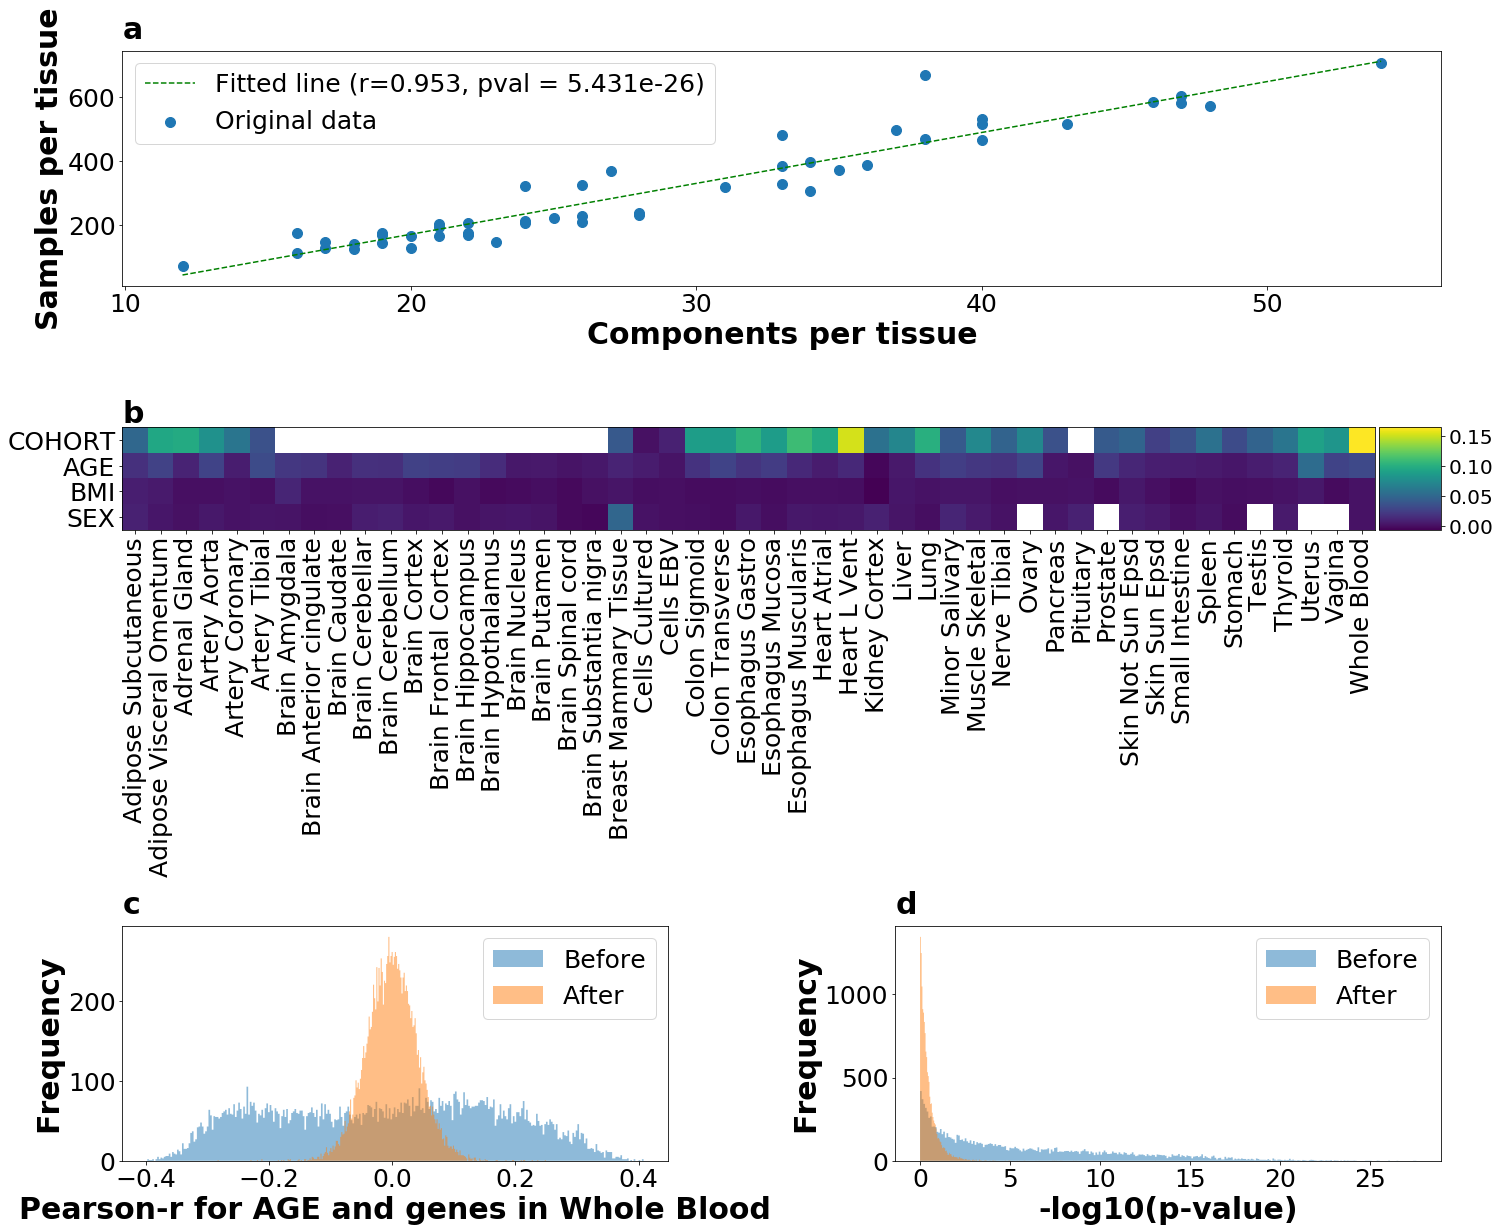

In [36]:
fig3 = plt.figure(constrained_layout=True, figsize=(20, 17))
gs = fig3.add_gridspec(3, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax2 = fig3.add_subplot(gs[1, :])
f3_ax3 = fig3.add_subplot(gs[2, 0])
f3_ax4 = fig3.add_subplot(gs[2, 1])

###

slope, intercept, r_value, p_value, std_err = stats.linregress(components_per_tissue, people_per_tissue)
fitted_label = f'Fitted line (r={round(r_value, 3)}, pval = {p_value:.3e})'

f3_ax1.scatter(x=components_per_tissue, y=people_per_tissue, marker='o', s=100, label='Original data')
min_ind, max_ind = np.argsort(components_per_tissue)[0], np.argsort(components_per_tissue)[-1]
filt_points = np.array([components_per_tissue[min_ind], components_per_tissue[max_ind]])
f3_ax1.plot(filt_points, intercept + slope*filt_points, c='g', linestyle='dashed', label=fitted_label)


f3_ax1.set_xlabel("Components per tissue", fontweight='bold', size=30)
f3_ax1.set_ylabel("Samples per tissue", fontweight='bold', size=30)
f3_ax1.tick_params(labelsize=25)
f3_ax1.legend(prop={'size': 25})
f3_ax1.annotate('a', xy=(0, 1.05), xycoords="axes fraction", fontsize=30, weight = 'bold')

###

im = f3_ax2.imshow(vars_before - vars_after)
divider = make_axes_locatable(f3_ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig3.colorbar(im, cax=cax)#, boundaries=np.linspace(-0.5, 0.5, 6))
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontsize(20)

f3_ax2.set_xticks(np.arange(len(TISSUES)))
f3_ax2.set_xticklabels([t.replace('_', ' ') for t in TISSUES], size=25)
# Rotate the tick labels and set their alignment.
plt.setp(f3_ax2.get_xticklabels(), rotation=90)
f3_ax2.set_yticks(np.arange(len(variables)))
f3_ax2.set_yticklabels(variables, size=25)
f3_ax2.annotate('b', xy=(0, 1.05), xycoords="axes fraction", fontsize=30, weight = 'bold')

###

# histtype='stepfilled' needed because of strange behaviour with the pdf generator
f3_ax3.hist(corrs_before, bins=300, alpha = 0.5, label='Before', histtype='stepfilled')
f3_ax3.hist(corrs_after, bins=300, alpha = 0.5, label='After', histtype='stepfilled')
f3_ax3.set_xlabel('Pearson-r for AGE and genes in Whole Blood', size=30, fontweight='bold')
f3_ax3.set_ylabel('Frequency', size=30, fontweight='bold')
f3_ax3.tick_params(labelsize=25)
f3_ax3.legend(prop={'size': 25})
f3_ax3.annotate('c', xy=(0, 1.05), xycoords="axes fraction", fontsize=30, weight = 'bold')

###

f3_ax4.hist(-np.log10(pvals_before), bins=300, alpha = 0.5, label='Before', histtype='stepfilled')
f3_ax4.hist(-np.log10(pvals_after), bins=300, alpha = 0.5, label='After', histtype='stepfilled')
f3_ax4.set_xlabel('-log10(p-value)', size=30, fontweight='bold')
f3_ax4.set_ylabel('Frequency', size=30, fontweight='bold')
f3_ax4.tick_params(labelsize=25)
f3_ax4.legend(prop={'size': 25})
f3_ax4.annotate('d', xy=(0, 1.05), xycoords="axes fraction", fontsize=30, weight = 'bold')

###

#plt.tight_layout()
plt.savefig('figures/confounds_mix.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()
plt.close()

## Specific confounds

In [93]:
tmp = demo_data.set_index('SUBJID')

def plot_for_variable(variable_to_correlate, tissues_to_exclude=[]):
    for tissue in TISSUES:
        if tissue in tissues_to_exclude:
            continue
        print(tissue)
        # Getting the SEX for each dataframe just in case they suffered some sort of reordering
        before_df = pd.read_csv("data_filtered/only_geneids_" + tissue + ".csv", index_col=0).join(tmp.loc[:, variable_to_correlate], how='inner')
        before_df.rename(columns=lambda x: x.replace('-', '.'), inplace=True) # looks like R changed this
        after_df = pd.read_csv("data_filtered/only_geneids_CORRECTED_" + tissue + ".csv", index_col=0).join(tmp.loc[:, variable_to_correlate], how='inner')

        labels_before = before_df[variable_to_correlate].values
        labels_after = after_df[variable_to_correlate].values

        before_df = before_df.drop(columns=[variable_to_correlate])
        after_df = after_df.drop(columns=[variable_to_correlate])

        corrs_before = []
        pvals_before = []
        corrs_after = []
        pvals_after = []

        for gene in before_df.columns.values:
            res = stats.pearsonr(before_df.loc[:,gene].values, labels_before)
            corrs_before.append(res[0])
            pvals_before.append(res[1])

            res = stats.pearsonr(after_df.loc[:,gene].values, labels_after)
            corrs_after.append(res[0])
            pvals_after.append(res[1])
        fig = plt.figure(figsize=(20,5))
        st = fig.suptitle(tissue, fontsize="xx-large")

        plt.subplot(1, 2, 1)
        plt.hist(corrs_before, bins=300, alpha = 0.5, label='Before')
        plt.hist(corrs_after, bins=300, alpha = 0.5, label='After')
        plt.title('Pearson-r')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.hist(pvals_before, bins=300, alpha = 0.5, label='Before')
        plt.hist(pvals_after, bins=300, alpha = 0.5, label='After')
        plt.title('p-vals')
        plt.legend()

        plt.tight_layout()

        st.set_y(0.95)
        fig.subplots_adjust(top=0.85)

        fig.savefig('figures/correction_' + variable_to_correlate + '_' + tissue + '.png')
        #plt.show()
        plt.close()

In [91]:
plot_for_variable('AGE')

Adipose_Subcutaneous
Adipose_Visceral_Omentum
Adrenal_Gland
Artery_Aorta
Artery_Coronary
Artery_Tibial
Brain_Amygdala
Brain_Anterior_cingulate
Brain_Caudate
Brain_Cerebellar
Brain_Cerebellum
Brain_Cortex
Brain_Frontal_Cortex
Brain_Hippocampus
Brain_Hypothalamus
Brain_Nucleus
Brain_Putamen
Brain_Spinal_cord
Brain_Substantia_nigra
Breast_Mammary_Tissue
Cells_Cultured
Cells_EBV
Colon_Sigmoid
Colon_Transverse
Esophagus_Gastro
Esophagus_Mucosa
Esophagus_Muscularis
Heart_Atrial
Heart_L_Vent
Kidney_Cortex
Liver
Lung
Minor_Salivary
Muscle_Skeletal
Nerve_Tibial
Ovary
Pancreas
Pituitary
Prostate
Skin_Not_Sun_Epsd
Skin_Sun_Epsd
Small_Intestine
Spleen
Stomach
Testis
Thyroid
Uterus
Vagina
Whole_Blood


In [95]:
plot_for_variable('SEX', tissues_to_exclude=['Ovary', 'Prostate', 'Testis', 'Uterus', 'Vagina'])

Adipose_Subcutaneous
Adipose_Visceral_Omentum
Adrenal_Gland
Artery_Aorta
Artery_Coronary
Artery_Tibial
Brain_Amygdala
Brain_Anterior_cingulate
Brain_Caudate
Brain_Cerebellar
Brain_Cerebellum
Brain_Cortex
Brain_Frontal_Cortex
Brain_Hippocampus
Brain_Hypothalamus
Brain_Nucleus
Brain_Putamen
Brain_Spinal_cord
Brain_Substantia_nigra
Breast_Mammary_Tissue
Cells_Cultured
Cells_EBV
Colon_Sigmoid
Colon_Transverse
Esophagus_Gastro
Esophagus_Mucosa
Esophagus_Muscularis
Heart_Atrial
Heart_L_Vent
Kidney_Cortex
Liver
Lung
Minor_Salivary
Muscle_Skeletal
Nerve_Tibial
Pancreas
Pituitary
Skin_Not_Sun_Epsd
Skin_Sun_Epsd
Small_Intestine
Spleen
Stomach
Thyroid
Whole_Blood


## Community segregation

In [70]:
from scipy.stats import mode

dict_segr = {
'Adipose_Subcutaneous': [0, 3, 0, 0, 0, 0, 3, 0, 0, 0],
'Adipose_Visceral_Omentum': [0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
'Adrenal_Gland': [0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 2, 0, 1, 17, 1, 1, 0],
'Artery_Aorta': [0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
'Artery_Coronary': [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
'Artery_Tibial': [0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0],
'Brain_Amygdala' : [2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 11],
'Brain_Anterior_cingulate': [0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 2, 0, 3, 0, 1, 0, 0, 3, 2],
'Brain_Caudate': [0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
'Brain_Cerebellar': [0, 0, 0, 0, 0, 8, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
'Brain_Cerebellum': [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
'Brain_Cortex': [0, 0, 0, 5, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0],
'Brain_Frontal_Cortex': [0, 0, 0, 6, 0, 0, 7, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 3, 2],
'Brain_Hippocampus' : [2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3],
'Brain_Hypothalamus': [0, 3, 0, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 1, 0, 3, 0, 1],
'Brain_Nucleus': [0, 3, 0, 0, 0, 0, 5, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
'Brain_Putamen' : [2, 0, 0, 0, 0, 0, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2],
'Brain_Spinal_cord': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 7],
'Brain_Substantia_nigra': [0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
'Breast_Mammary_Tissue': [0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
'Cells_Cultured': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
'Cells_EBV': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
'Colon_Sigmoid': [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0],
'Colon_Transverse': [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
'Esophagus_Gastro': [0, 0, 0, 4, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
'Esophagus_Mucosa': [0, 0, 0, 0, 6, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
'Esophagus_Muscularis': [0, 0, 0, 0, 5, 0, 7, 0, 0, 0, 0, 0, 0],
'Heart_Atrial': [0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0],
'Heart_L_Vent': [2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
'Kidney_Cortex': [0, 0, 0, 0, 0, 0, 0, 3, 0, 11, 1, 0, 0, 1, 0, 0, 0, 9, 0, 0, 0, 0, 1, 0, 2, 2, 6, 0, 2],
'Liver': [0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0],
'Lung': [0, 0, 0, 4, 0, 4, 1, 0, 0, 0, 0, 0, 0],
'Minor_Salivary': [0, 0, 3, 7, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10],
'Muscle_Skeletal': [0, 0, 0, 0, 0, 0, 0, 0],
'Nerve_Tibial': [0, 0, 0, 0, 0, 5, 0, 8, 0, 0],
'Ovary': [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2],
'Pancreas': [0, 0, 0, 5, 0, 0, 0, 0, 7, 0, 0, 0],
'Pituitary': [0, 0, 0, 5, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
'Prostate': [0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
'Skin_Not_Sun_Epsd': [0, 0, 0, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
'Skin_Sun_Epsd': [0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0],
'Small_Intestine': [0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 10, 0, 1, 0, 0, 0, 0],
'Spleen': [0, 0, 0, 0, 0, 7, 0, 1, 0, 0, 1, 0, 16, 0, 0, 0],
'Stomach': [0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
'Testis': [0, 0, 0, 0, 6, 0, 7, 0, 0, 0, 0],
'Thyroid': [0, 0, 4, 0, 0, 0, 5, 0, 0, 0, 0],
'Uterus': [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 1, 0],
'Vagina' : [1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1],
'Whole_Blood': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

In [72]:
for key, values in dict_segr.items():
    print(key, ':', mode(values))
    
for key, values in dict_segr.items():
    print(key, ':', np.max(values))

Adipose_Subcutaneous : ModeResult(mode=array([0]), count=array([8]))
Adipose_Visceral_Omentum : ModeResult(mode=array([0]), count=array([11]))
Adrenal_Gland : ModeResult(mode=array([0]), count=array([11]))
Artery_Aorta : ModeResult(mode=array([0]), count=array([13]))
Artery_Coronary : ModeResult(mode=array([0]), count=array([15]))
Artery_Tibial : ModeResult(mode=array([0]), count=array([10]))
Brain_Amygdala : ModeResult(mode=array([0]), count=array([15]))
Brain_Anterior_cingulate : ModeResult(mode=array([0]), count=array([14]))
Brain_Caudate : ModeResult(mode=array([0]), count=array([15]))
Brain_Cerebellar : ModeResult(mode=array([0]), count=array([17]))
Brain_Cerebellum : ModeResult(mode=array([0]), count=array([16]))
Brain_Cortex : ModeResult(mode=array([0]), count=array([16]))
Brain_Frontal_Cortex : ModeResult(mode=array([0]), count=array([12]))
Brain_Hippocampus : ModeResult(mode=array([0]), count=array([14]))
Brain_Hypothalamus : ModeResult(mode=array([0]), count=array([12]))
Brai

## Tissue predictions from communitites (creating the images and saving in disk what are the interesting communities)

In [25]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from definitions import TISSUES

In [41]:
interesting_communities = {}

for tissue in TISSUES:
    print(tissue, ':')
    all_data = []
    indexes = []

    communities = pickle.load(open("results/louvain_modules_" + tissue + ".pkl", "rb"))

    try:
        for community_id in range(1, 999999):
            arr_com = []
            dic_community = pickle.load(open("svm_results/" + tissue + '_' + str(community_id) + ".pkl", "rb"))
            len_common = len(dic_community['genes'])
            if len_common <= 3:
                continue

            try:
                for f in TISSUES:
                    arr_com.append(dic_community[f]['f1'])
            except Exception as _:
                print("Strange error:", tissue)
                break

            all_data.append(arr_com)
            indexes.append("ID {0:2d}".format(community_id) + " with size {0:2d} - ".format(len_common))  # + "-" + str(community_id))
    except Exception as e:
        pass
        # End of available communitites
        #print("Last community found: " + str(e))
        # traceback.print_exc()

    all_df = pd.DataFrame(all_data, index=indexes, columns=TISSUES)
    all_df.sort_index(ascending=True)    
    
    ### Plotting only strong communities
    #for i in range(2):
        #if i == 1:
    all_df[all_df > 0.8] = 1
    all_df[all_df < 0.8] = 0
    # all_df
    interesting_communities[tissue] = [int(x.split('with')[0].split('ID')[1]) for x in all_df.loc[all_df.sum(axis=1) >= 1,:].index.values]
    print('Interesting communities:', interesting_communities[tissue])
    fig, ax = plt.subplots(figsize=(20, int(len(indexes)/1.2)))

    im = ax.imshow(all_df.values, cmap='bwr', interpolation='none', vmin=0, vmax=1)

    ax.set_xticks(np.arange(len(TISSUES)))
    ax.set_xticklabels([t.replace('_', ' ') for t in TISSUES], size=25)

    ax.set_yticks(np.arange(len(indexes)))
    ax.set_yticklabels(indexes, size=25)

    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    #         rotation_mode="anchor")
    plt.setp(ax.get_xticklabels(), rotation=90)

    ax.set_title("F1 scores of each community predicting tissue", fontweight='bold', fontsize=35)
    ax.set_ylabel(tissue.replace('_', ' ') + " communities", fontweight='bold', fontsize=35)
    ax.set_xlabel("Tissues being predicted", fontweight='bold', fontsize=35)

    ax.grid(linestyle='dashed', linewidth=0.6)

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.5 inch.
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.5)

    #fig.colorbar(im, cax=cax)
    fig.tight_layout()
    plt.savefig(f'figures/tissue_prediction_from_{tissue}.pdf', bbox_inches = 'tight', pad_inches = 0)
    #plt.show()
    plt.close(fig)

Adipose_Subcutaneous :
Interesting communities: [2, 4, 8, 12, 13, 14]
Adipose_Visceral_Omentum :
Interesting communities: [1, 2, 4, 5, 6, 8, 13, 16, 17, 18, 19, 22, 23, 24, 26, 28]
Adrenal_Gland :
Interesting communities: [2, 6, 7, 8, 10, 11, 14, 17, 19, 20, 21, 23, 26]
Artery_Aorta :
Interesting communities: [1, 3, 5, 7, 10, 11, 14, 16, 20, 21, 24, 25]
Artery_Coronary :
Interesting communities: [1, 3, 4, 6, 7, 10, 11, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30]
Artery_Tibial :
Interesting communities: [3, 6, 7, 9, 11, 13, 14, 15, 17, 18]
Brain_Amygdala :
Interesting communities: [1, 3, 4, 5, 6, 7, 10, 13, 14, 15, 22, 23, 27, 28, 29]
Brain_Anterior_cingulate :
Interesting communities: [2, 3, 4, 6, 8, 9, 10, 12, 14, 15, 19, 22, 24, 25, 26, 27]
Brain_Caudate :
Interesting communities: [1, 3, 5, 6, 7, 8, 10, 12, 13, 16, 18, 20, 21, 22, 29, 32]
Brain_Cerebellar :
Interesting communities: [1, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 23, 24, 25, 26, 29]
Brain_Cerebellum :
Interesting communit

In [3]:
# Pickling the interesting communitites to be used in the future
pickle.dump(interesting_communities, open('results/interesting_communitites.pkl', 'wb'))

## Running the UMAP from the master matrix

In [ ]:
# Recheck these seeds when using umap bootstrapping with replacement.
sampled_df = filtered_genes_df.sample(frac=1.0, replace=True, random_state=1111)
sampled_df.shape

%%time
emb_2d = umap.UMAP(n_neighbors=5,
                   min_dist=0.25,
                  learning_rate=0.5,
                  spread=1,
                  random_state=1111).fit_transform(sampled_df)
emb_2d.shape

In [1]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from definitions import TISSUES

In [2]:
%%time
all_df = pd.read_csv('data_filtered/master_matrix.csv', index_col=0)

CPU times: user 3min 30s, sys: 11.7 s, total: 3min 42s
Wall time: 3min 52s


In [3]:
%%time
emb_2d = umap.UMAP(n_neighbors=5,
                   min_dist=0.25,
                  learning_rate=0.5,
                  spread=1,
                  random_state=1111).fit_transform(all_df.drop(columns=['tissue']))

CPU times: user 1min 4s, sys: 33.7 s, total: 1min 37s
Wall time: 1min 34s


In [4]:
emb_2d.shape

(15201, 2)

In [5]:
umap_embed = pd.DataFrame(emb_2d, columns=['1', '2'], index=all_df.index)

In [14]:
#https://matplotlib.org/users/annotations.html#plotting-guide-annotation
# Info about the column
no_labels = len(TISSUES)

plt.figure(figsize=(20,10))
    
for i, tissue in enumerate(TISSUES):
    tmp_embedded = np.array(umap_embed.filter(like=tissue, axis=0))
    plt.scatter(tmp_embedded[:,0], tmp_embedded[:,1], s=25, label=tissue)
    bbox_props = dict(boxstyle="round", lw=2, alpha=0.3)
    
    x_text_coord = np.mean(tmp_embedded[:,0])
    y_text_coord = np.mean(tmp_embedded[:,1])
    if tissue in ['Brain_Cortex', 'Skin_Not_Sun_Epsd']:
        x_text_coord += -0.5
        y_text_coord += 0.2
    elif tissue in ['Brain_Putamen', 'Skin_Sun_Epsd']:
        x_text_coord += 0.5
        y_text_coord += -0.2
    plt.text(x_text_coord, y_text_coord, tissue.replace('_', ' '), ha="center", va="center", 
             rotation=45, fontweight='bold', backgroundcolor='white',
            size=15,
            bbox=bbox_props)
    
    
plt.xlabel('Component 1', fontweight='bold', size=25)
plt.xticks(fontweight='bold', size=20)
plt.yticks(fontweight='bold', size=20)
plt.ylabel('Component 2', fontweight='bold', size=25)

plt.tight_layout()
plt.savefig("figures/umap_master_matrix.png")
#plt.show()
plt.close()

### Now on the submatrix

In [15]:
%%time
genes_existing = set()

for tissue in TISSUES:
    all_data = []
    indexes = []

    communities = pickle.load(open("results/louvain_modules_" + tissue + ".pkl", "rb"))

    try:
        for community_id in range(1, 999999):
            arr_com = []
            dic_community = pickle.load(open("svm_results/" + tissue + '_' + str(community_id) + ".pkl", "rb"))
            len_common = len(dic_community['genes'])
            if len_common <= 3:
                continue
                
            for gene in dic_community['genes']:
                genes_existing.add(gene)
    except Exception as e:
        pass

CPU times: user 308 ms, sys: 68 ms, total: 376 ms
Wall time: 1.08 s


In [16]:
filtered_genes_df = all_df.drop(columns=['tissue']).loc[:, sorted(list(genes_existing))]
filtered_genes_df.shape

(15201, 3259)

In [17]:
%%time
emb_2d = umap.UMAP(n_neighbors=5,
                   min_dist=0.25,
                  learning_rate=0.5,
                  spread=1,
                  random_state=1111).fit_transform(filtered_genes_df)
emb_2d.shape

CPU times: user 19.4 s, sys: 312 ms, total: 19.7 s
Wall time: 16.8 s


(15201, 2)

In [19]:
umap_embed = pd.DataFrame(emb_2d, columns=['1', '2'], index=filtered_genes_df.index)

In [39]:
#https://matplotlib.org/users/annotations.html#plotting-guide-annotation
# Info about the column
no_labels = len(TISSUES)

plt.figure(figsize=(20,10))
    
for i, tissue in enumerate(TISSUES):
    tmp_embedded = np.array(umap_embed.filter(like=tissue, axis=0))
    plt.scatter(tmp_embedded[:,0], tmp_embedded[:,1], s=25, label=tissue)
    bbox_props = dict(boxstyle="round", lw=2, alpha=0.3)
    
    x_text_coord = np.mean(tmp_embedded[:,0])
    y_text_coord = np.mean(tmp_embedded[:,1])
    if tissue in ['Adipose_Visceral_Omentum', 'Breast_Mammary_Tissue', 'Brain_Hypothalamus']:
        x_text_coord += -0.3
        #y_text_coord += 2
    elif tissue in ['Spleen', 'Minor_Salivary', 'Brain_Spinal_cord', 'Brain_Cerebellar', 'Brain_Cortex', 'Skin_Not_Sun_Epsd']:
        x_text_coord += 0.3
        y_text_coord += -0.2
    elif tissue in ['Brain_Cerebellum', 'Brain_Frontal_Cortex', 'Nerve_Tibial', 'Skin_Sun_Epsd']:
        x_text_coord += -0.3
        y_text_coord += 0.3
    plt.text(x_text_coord, y_text_coord, tissue.replace('_', ' '), ha="center", va="center", 
             rotation=45, fontweight='bold', backgroundcolor='white',
            size=15,
            bbox=bbox_props)
    
plt.xlabel('Component 1', fontweight='bold', size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel('Component 2', fontweight='bold', size=25)

plt.tight_layout()
plt.savefig("figures/umap_subgenes_matrix.png")
#plt.show()
plt.close()

## UMAP uncertainty bootstrapping - on submatrix of genes belonging to some community

In [1]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from math import sqrt
from collections import defaultdict
from mpl_toolkits.axes_grid1 import make_axes_locatable

from definitions import TISSUES

In [2]:
%%time
all_df = pd.read_csv('data_filtered/master_matrix.csv', index_col=0)

CPU times: user 5min 8s, sys: 23 s, total: 5min 31s
Wall time: 5min 40s


In [3]:
%%time
genes_existing = set()

for tissue in TISSUES:
    all_data = []
    indexes = []

    communities = pickle.load(open("results/louvain_modules_" + tissue + ".pkl", "rb"))

    try:
        for community_id in range(1, 999999):
            arr_com = []
            dic_community = pickle.load(open("svm_results/" + tissue + '_' + str(community_id) + ".pkl", "rb"))
            len_common = len(dic_community['genes'])
            if len_common <= 3:
                continue
                
            for gene in dic_community['genes']:
                genes_existing.add(gene)
    except Exception as e:
        pass

CPU times: user 364 ms, sys: 64 ms, total: 428 ms
Wall time: 1.08 s


In [7]:
filtered_genes_df = all_df.drop(columns=['tissue']).loc[:, sorted(list(genes_existing))]
filtered_genes_df.shape

(15201, 3259)

In [46]:
BOOTSTRAP_RUNS = 500
global_distances = np.zeros((len(TISSUES), len(TISSUES)))
distance_vectors = defaultdict(list)

for run_i in range(BOOTSTRAP_RUNS):
    sampled_df = filtered_genes_df.sample(frac=0.8, replace=False, random_state=run_i)
    print(run_i, end=',')
    
    emb_2d = umap.UMAP(n_neighbors=5,
                       min_dist=0.25,
                       learning_rate=0.5,
                       spread=1,
                       random_state=1111).fit_transform(sampled_df)
    umap_embed = pd.DataFrame(emb_2d, columns=['1', '2'], index=sampled_df.index)
    
    for tissue1_i in range(len(TISSUES)):
        tmp_embedded1 = np.array(umap_embed.filter(like=TISSUES[tissue1_i], axis=0))

        x1 = np.mean(tmp_embedded1[:,0])
        y1 = np.mean(tmp_embedded1[:,1])

        for tissue2_i in range(tissue1_i+1, len(TISSUES)):
            tmp_embedded2 = np.array(umap_embed.filter(like=TISSUES[tissue2_i], axis=0))

            x2 = np.mean(tmp_embedded2[:,0])
            y2 = np.mean(tmp_embedded2[:,1])
            distance_value = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        
            global_distances[tissue1_i, tissue2_i] += distance_value
            distance_vectors[f'{tissue1_i}-{tissue2_i}'].append(distance_value)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [47]:
pd.DataFrame(distance_vectors).to_csv('results/distance_vectors.csv')

In [48]:
averaged_distances = global_distances / BOOTSTRAP_RUNS

In [53]:
np.save('results/averaged_distances.npy', averaged_distances)

In [62]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.grid(linestyle='dashed', linewidth=0.4)
im = ax.imshow(averaged_distances)

ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()

ax.set_xticks(np.arange(len(TISSUES)))
ax.set_xticklabels([t.replace('_', ' ') for t in TISSUES], size=15)

ax.set_yticks(np.arange(len(TISSUES)))
ax.set_yticklabels([t.replace('_', ' ') for t in TISSUES], size=15)
plt.setp(ax.get_xticklabels(), rotation=90)


# Making the colorbar nicely fit
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.tight_layout()

plt.savefig('figures/averaged_distances.pdf', bbox_inches = 'tight', pad_inches = 0)

#plt.show()
plt.close()

## UMAP on brain-only multiplex genes

In [3]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from math import sqrt
from collections import defaultdict
from mpl_toolkits.axes_grid1 import make_axes_locatable

from definitions import TISSUES

In [4]:
%%time
all_df = pd.read_csv('data_filtered/master_matrix.csv', index_col=0)

CPU times: user 3min 24s, sys: 34.9 s, total: 3min 59s
Wall time: 4min 9s


In [5]:
def plot_umap(sub_df, save_path=None):
    emb_2d = umap.UMAP(n_neighbors=5,
                       min_dist=0.25,
                      learning_rate=0.5,
                      spread=1,
                      random_state=1111).fit_transform(sub_df)

    umap_embed = pd.DataFrame(emb_2d, columns=['1', '2'], index=sub_df.index)
    #https://matplotlib.org/users/annotations.html#plotting-guide-annotation
    # Info about the column
    no_labels = len(TISSUES)

    plt.figure(figsize=(20,10))

    for i, tissue in enumerate(TISSUES):
        tmp_embedded = np.array(umap_embed.filter(like=tissue, axis=0))
        plt.scatter(tmp_embedded[:,0], tmp_embedded[:,1], s=25, label=tissue)
        bbox_props = dict(boxstyle="round", lw=2, alpha=0.4)

        x_text_coord = np.mean(tmp_embedded[:,0])
        y_text_coord = np.mean(tmp_embedded[:,1])
        #if tissue in ['Brain_Cortex', 'Skin_Not_Sun_Epsd']:
        #    x_text_coord += -0.5
        #    y_text_coord += 0.2
        #elif tissue in ['Brain_Putamen', 'Skin_Sun_Epsd']:
        #    x_text_coord += 0.5
        #    y_text_coord += -0.2
        if tissue == 'Cells_Cultured':
            plt.text(x_text_coord, y_text_coord, tissue.replace('_', ' '), ha="center", va="center", 
                     rotation=45, fontweight='bold', backgroundcolor='white',
                    size=15,
                    bbox=bbox_props)


    plt.xlabel('Component 1', fontweight='bold', size=25)
    plt.xticks(fontweight='bold', size=20)
    plt.yticks(fontweight='bold', size=20)
    plt.ylabel('Component 2', fontweight='bold', size=25)

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)

    plt.show()
    plt.close()

In [6]:
brain_genes = ['GP2', 'PNLIPRP1', 'CTRB1', 'PLA2G1B', 'CPB1', 'SPINK1', 'PNLIP', 'CTRC', 'CTRB2', 'CLPS', 'CELA3A', 'CELA2A', 'CPA1', 'REG1B', 'PRSS1', 'REG1A', 'SYCN', 'CELA3B', 'HBA2', 'ALAS2', 'HBD', 'HBB', 'HBA1', 'CD74', 'HLA.DRA', 'KDM5C', 'ZFX', 'DDX3X', 'RPS15A', 'RPL35A', 'RPS27', 'RPS12', 'RPL32', 'RPL26', 'RPL23', 'RPL11', 'RPL37A', 'RPL31', 'RPL30', 'RPL36A', 'RPL21', 'RPL13A', 'RPS21', 'RPS3A', 'RPS16', 'RPS29', 'RPL27A', 'RPL38', 'TMEM160', 'C4orf48', 'PRR7', 'CCDC85B', 'PCSK1N', 'ZNF771', 'TPGS1', 'PDXP', 'MYH2', 'MB', 'TNNT3', 'MYL1', 'MYL2', 'CKM', 'TNNI1', 'MYH1', 'ACTA1', 'SFTPB', 'SFTPA1', 'FGA', 'FGB', 'ORM1', 'HSPA1A', 'HSPA1B', 'LIPF', 'PGC', 'PRM2', 'PRM1', 'COL4A2', 'COL4A1', 'OAS2', 'IFI44L', 'IFI44', 'OAS1', 'ACTA2', 'MYH11', 'MYL9', 'FCGR3B', 'CXCR1', 'C1QA', 'C1QB', 'C1QC', 'CASP14', 'KRT2', 'CALML5', 'KRT1', 'MOBP', 'MBP', 'FOS', 'DUSP1', 'C21orf33', 'PWP2', 'SPRR3', 'KRT6A', 'CRNN', 'KRT13', 'KRT4', 'S100A8', 'S100A9', 'GH1', 'PRL']
print(len(brain_genes))

109


In [7]:
brain_only_df = all_df.drop(columns=['tissue']).loc[:, brain_genes]
brain_only_df.shape

(15201, 109)

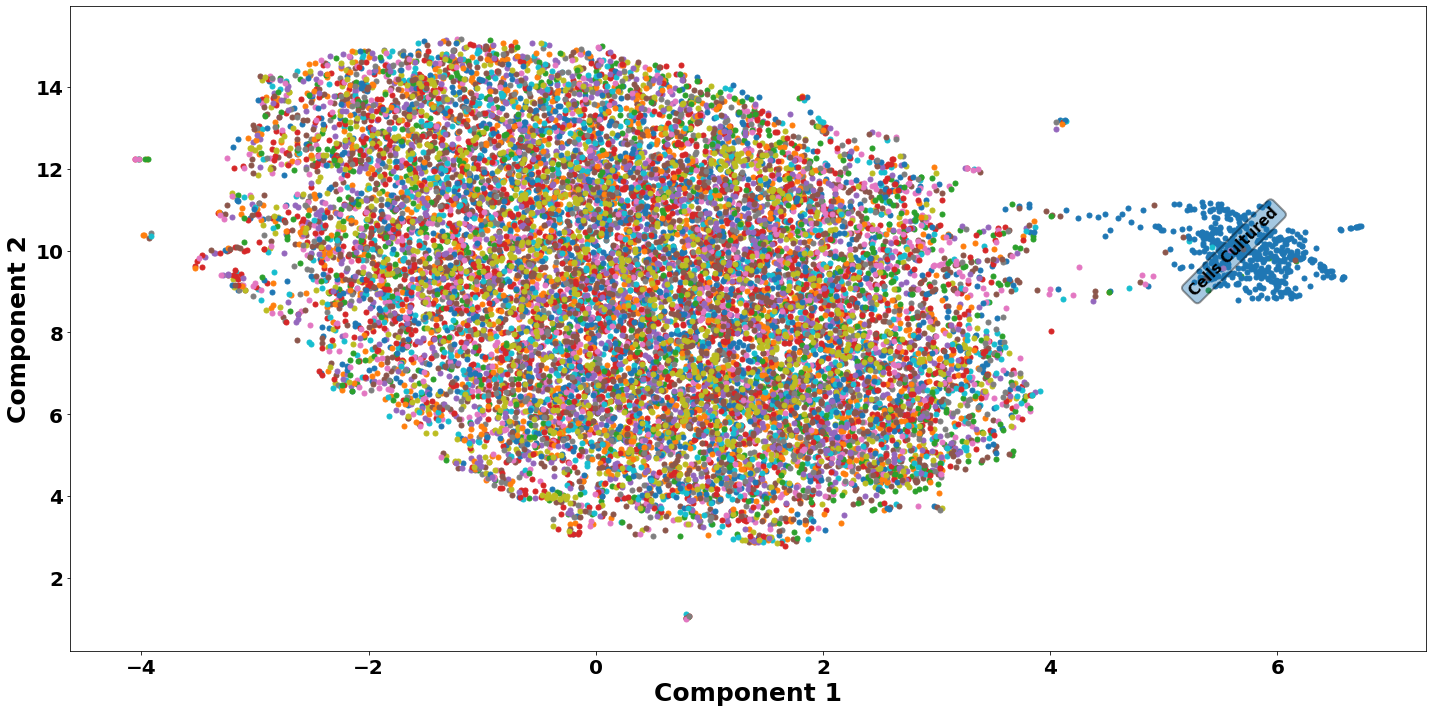

In [8]:
plot_umap(brain_only_df, save_path='figures/umap_allbrain.pdf')

In [75]:
brain_intestines = ['PLA2G1B', 'CELA3A', 'CPA1', 'CTRC', 'CTRB2', 'PNLIPRP1', 'PNLIP', 'CLPS', 'CTRB1', 'CELA3B', 'CPB1', 'SYCN', 'CELA2A', 'PRSS1', 'MYL1', 'ACTA1', 'MYL2', 'CKM', 'CD74', 'HLA.DRA', 'RPS29', 'RPL32', 'RPL30', 'RPL11', 'RPL37A', 'RPL31', 'RPL26', 'RPL36A', 'RPL23', 'RPL38', 'RPS21', 'RPL13A', 'SPRR3', 'KRT4', 'KRT13', 'KRT6A', 'CRNN', 'GH1', 'PRL', 'LIPF', 'PGC', 'ORM1', 'FGA', 'FGB', 'KDM5C', 'ZFX', 'DDX3X', 'RPS27', 'RPL35A', 'RPS15A', 'S100A8', 'S100A9', 'FCGR3B', 'CXCR1', 'KRT2', 'KRT1', 'CASP14', 'CALML5', 'MYH1', 'MYH2', 'SFTPA1', 'SFTPB', 'PRM2', 'PRM1', 'REG1B', 'REG1A', 'DUSP1', 'FOS', 'HBA1', 'HBB', 'HBA2', 'C21orf33', 'PWP2', 'TMEM160', 'TPGS1', 'IFI44L', 'IFI44', 'C1QB', 'C1QC', 'C1QA', 'HSPA1B', 'HSPA1A']
print(len(brain_intestines))

82


In [78]:
brain_intestines_df = all_df.drop(columns=['tissue']).loc[:, brain_intestines]
brain_intestines_df.shape

(15201, 82)

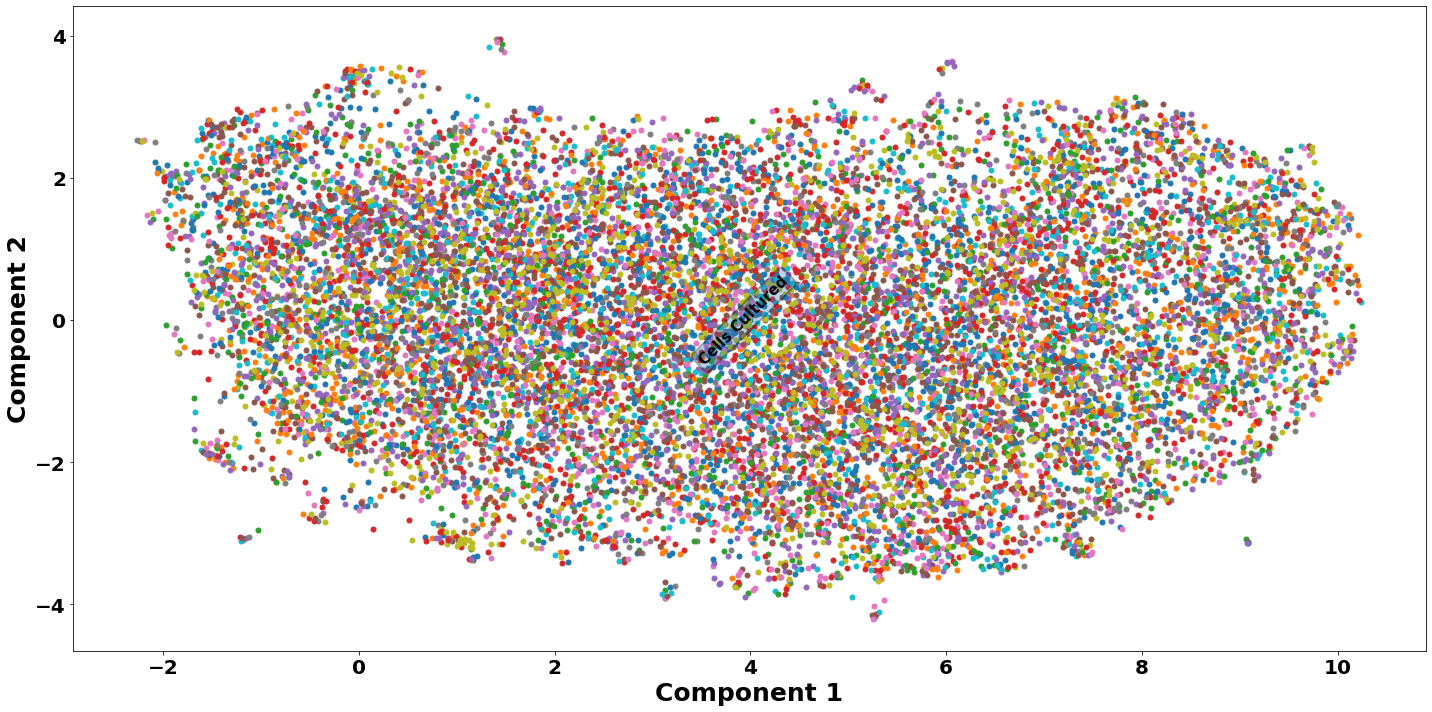

In [79]:
plot_umap(brain_intestines_df)

In [80]:
brain_blood = ['RPL38', 'RPL13A', 'RPL37A', 'RPL27A', 'REG1A', 'SYCN', 'PLA2G1B', 'CELA2A', 'CTRB2', 'CTRB1', 'CELA3B', 'CELA3A', 'CPB1', 'PNLIP', 'PRSS1', 'REG1B', 'CPA1', 'GP2', 'PNLIPRP1', 'CLPS', 'PWP2', 'C21orf33', 'CKM', 'MYL2', 'ACTA1', 'MYH2', 'TNNI1', 'MB', 'MYL1', 'C1QB', 'C1QA', 'C1QC', 'KRT13', 'KRT4', 'CRNN', 'SPRR3', 'RPS3A', 'RPL31', 'RPL32', 'RPL23', 'RPS29', 'RPL30', 'RPS21', 'CALML5', 'KRT2', 'CASP14', 'PRM2', 'PRM1', 'RPS27', 'RPS15A', 'PGC', 'LIPF', 'TMEM160', 'C4orf48', 'S100A9', 'S100A8', 'HBD', 'HBB', 'HBA1', 'HBA2', 'FGA', 'FGB', 'RPL36A', 'RPL26', 'SFTPB', 'SFTPA1', 'ZFX', 'KDM5C']
print(len(brain_blood))
brain_blood_df = all_df.drop(columns=['tissue']).loc[:, brain_blood]
brain_blood_df.shape

68


(15201, 68)

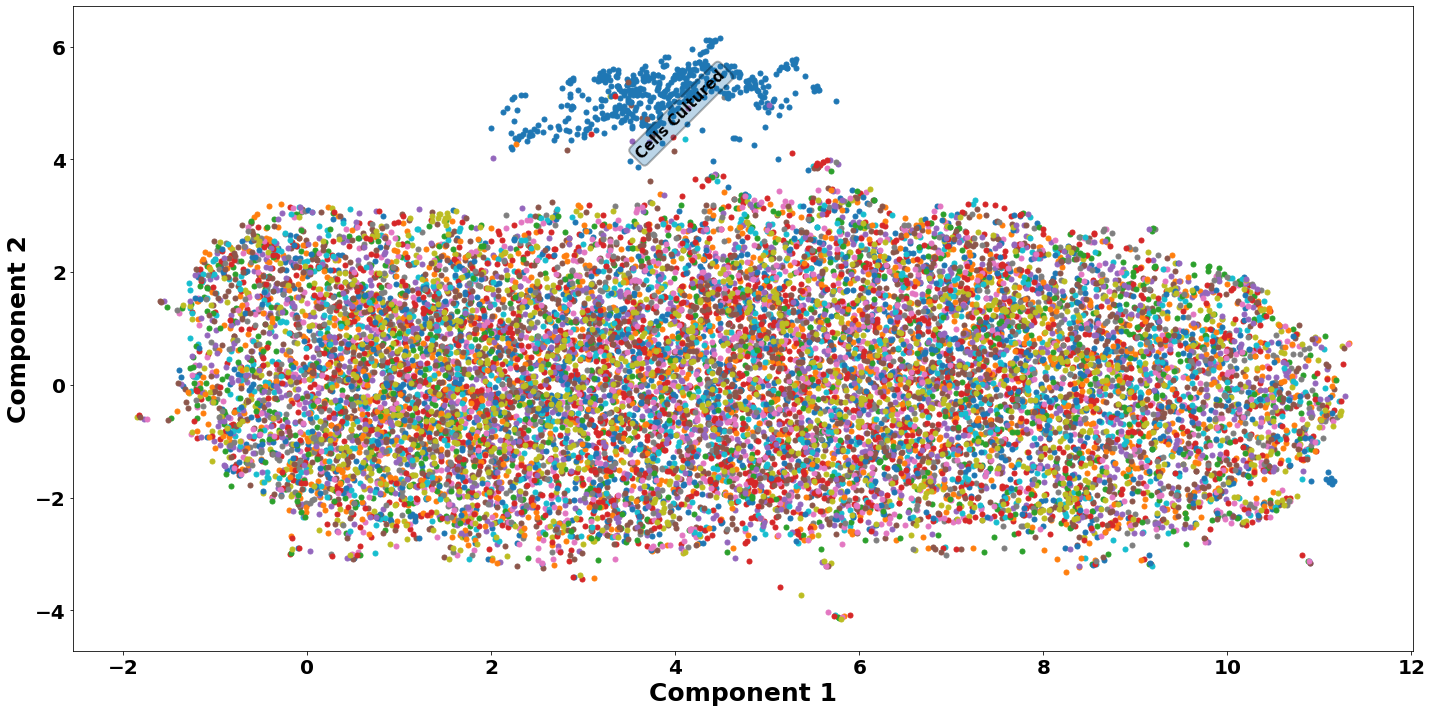

In [81]:
plot_umap(brain_blood_df)

In [83]:
len(set(brain_genes).intersection(set(brain_blood)))

68

In [85]:
len(set(brain_blood).intersection(set(brain_intestines)))

61

## Community enrichment numbers

In [16]:
import pickle
import numpy as np
from definitions import TISSUES

In [19]:
total_num_communities = 0

for tissue_name in TISSUES:
    communities = pickle.load(open("results/louvain_modules_" + tissue_name + ".pkl", "rb"))
    corr_mat = pd.read_pickle("data/corr_" + tissue_name + ".pkl")

    for community in np.unique(communities[0]):
        common = np.array(corr_mat.columns)[communities[0] == community]

        if len(common) <= 3:
            continue

        total_num_communities += 1

In [21]:
# Not enriched proteins percentage
enriched_num = 114
print((total_num_communities - enriched_num ) / total_num_communities)
print( enriched_num / total_num_communities)

0.9172113289760349
0.08278867102396514


In [22]:
tissues_with_enrichment = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adipose_Visceral_Omentum', 'Adipose_Visceral_Omentum', 'Adrenal_Gland', 'Adrenal_Gland', 'Artery_Aorta', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Coronary', 'Artery_Tibial', 'Brain_Amygdala', 'Brain_Amygdala', 'Brain_Amygdala', 'Brain_Anterior_cingulate', 'Brain_Anterior_cingulate', 'Brain_Anterior_cingulate', 'Brain_Caudate', 'Brain_Caudate', 'Brain_Caudate', 'Brain_Cerebellar', 'Brain_Cerebellar', 'Brain_Cerebellum', 'Brain_Cerebellum', 'Brain_Cortex', 'Brain_Cortex', 'Brain_Cortex', 'Brain_Frontal_Cortex', 'Brain_Frontal_Cortex', 'Brain_Frontal_Cortex', 'Brain_Hippocampus', 'Brain_Hippocampus', 'Brain_Hippocampus', 'Brain_Hypothalamus', 'Brain_Hypothalamus', 'Brain_Nucleus', 'Brain_Nucleus', 'Brain_Putamen', 'Brain_Putamen', 'Brain_Putamen', 'Brain_Spinal_cord', 'Brain_Spinal_cord', 'Brain_Spinal_cord', 'Brain_Substantia_nigra', 'Brain_Substantia_nigra', 'Brain_Substantia_nigra', 'Breast_Mammary_Tissue', 'Cells_Cultured', 'Cells_Cultured', 'Cells_EBV', 'Colon_Sigmoid', 'Colon_Sigmoid', 'Colon_Transverse', 'Colon_Transverse', 'Colon_Transverse', 'Esophagus_Gastro', 'Esophagus_Gastro', 'Esophagus_Mucosa', 'Esophagus_Mucosa', 'Esophagus_Mucosa', 'Esophagus_Mucosa', 'Esophagus_Mucosa', 'Esophagus_Muscularis', 'Esophagus_Muscularis', 'Heart_Atrial', 'Heart_Atrial', 'Heart_Atrial', 'Heart_L_Vent', 'Heart_L_Vent', 'Heart_L_Vent', 'Kidney_Cortex', 'Kidney_Cortex', 'Kidney_Cortex', 'Kidney_Cortex', 'Liver', 'Liver', 'Liver', 'Liver', 'Lung', 'Lung', 'Lung', 'Lung', 'Minor_Salivary', 'Minor_Salivary', 'Minor_Salivary', 'Muscle_Skeletal', 'Nerve_Tibial', 'Ovary', 'Ovary', 'Ovary', 'Pancreas', 'Pancreas', 'Pituitary', 'Pituitary', 'Pituitary', 'Pituitary', 'Prostate', 'Prostate', 'Skin_Not_Sun_Epsd', 'Skin_Not_Sun_Epsd', 'Skin_Sun_Epsd', 'Small_Intestine', 'Small_Intestine', 'Spleen', 'Spleen', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Thyroid', 'Uterus', 'Uterus', 'Vagina', 'Vagina']

In [23]:
set(TISSUES) - set(tissues_with_enrichment)

{'Whole_Blood'}

In [29]:
from itertools import groupby
for key, group in groupby(tissues_with_enrichment):
    print(key, '\t\t', len(list(group)))

Adipose_Subcutaneous 		 1
Adipose_Visceral_Omentum 		 3
Adrenal_Gland 		 2
Artery_Aorta 		 2
Artery_Coronary 		 2
Artery_Tibial 		 1
Brain_Amygdala 		 3
Brain_Anterior_cingulate 		 3
Brain_Caudate 		 3
Brain_Cerebellar 		 2
Brain_Cerebellum 		 2
Brain_Cortex 		 3
Brain_Frontal_Cortex 		 3
Brain_Hippocampus 		 3
Brain_Hypothalamus 		 2
Brain_Nucleus 		 2
Brain_Putamen 		 3
Brain_Spinal_cord 		 3
Brain_Substantia_nigra 		 3
Breast_Mammary_Tissue 		 1
Cells_Cultured 		 2
Cells_EBV 		 1
Colon_Sigmoid 		 2
Colon_Transverse 		 3
Esophagus_Gastro 		 2
Esophagus_Mucosa 		 5
Esophagus_Muscularis 		 2
Heart_Atrial 		 3
Heart_L_Vent 		 3
Kidney_Cortex 		 4
Liver 		 4
Lung 		 4
Minor_Salivary 		 3
Muscle_Skeletal 		 1
Nerve_Tibial 		 1
Ovary 		 3
Pancreas 		 2
Pituitary 		 4
Prostate 		 2
Skin_Not_Sun_Epsd 		 2
Skin_Sun_Epsd 		 1
Small_Intestine 		 2
Spleen 		 3
Stomach 		 1
Testis 		 1
Thyroid 		 2
Uterus 		 2
Vagina 		 2


## Global Multiplex Index Distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
multiplex_cases = ['all_tissues', 'brain_and_intestines', 'brain_and_wholeblood', 'non_brain', 'only_brain']


all_distributions = []

for multiplex_name in multiplex_cases:
    multiplex_indexes = pd.read_csv(f'results/global_multiplexity_{multiplex_name}_all.csv', index_col=0)
    multiplex_indexes = multiplex_indexes.values[np.triu_indices(multiplex_indexes.shape[0], k=1)]
    multiplex_indexes = multiplex_indexes[multiplex_indexes > 0]
    
    all_distributions.append(multiplex_indexes)
    


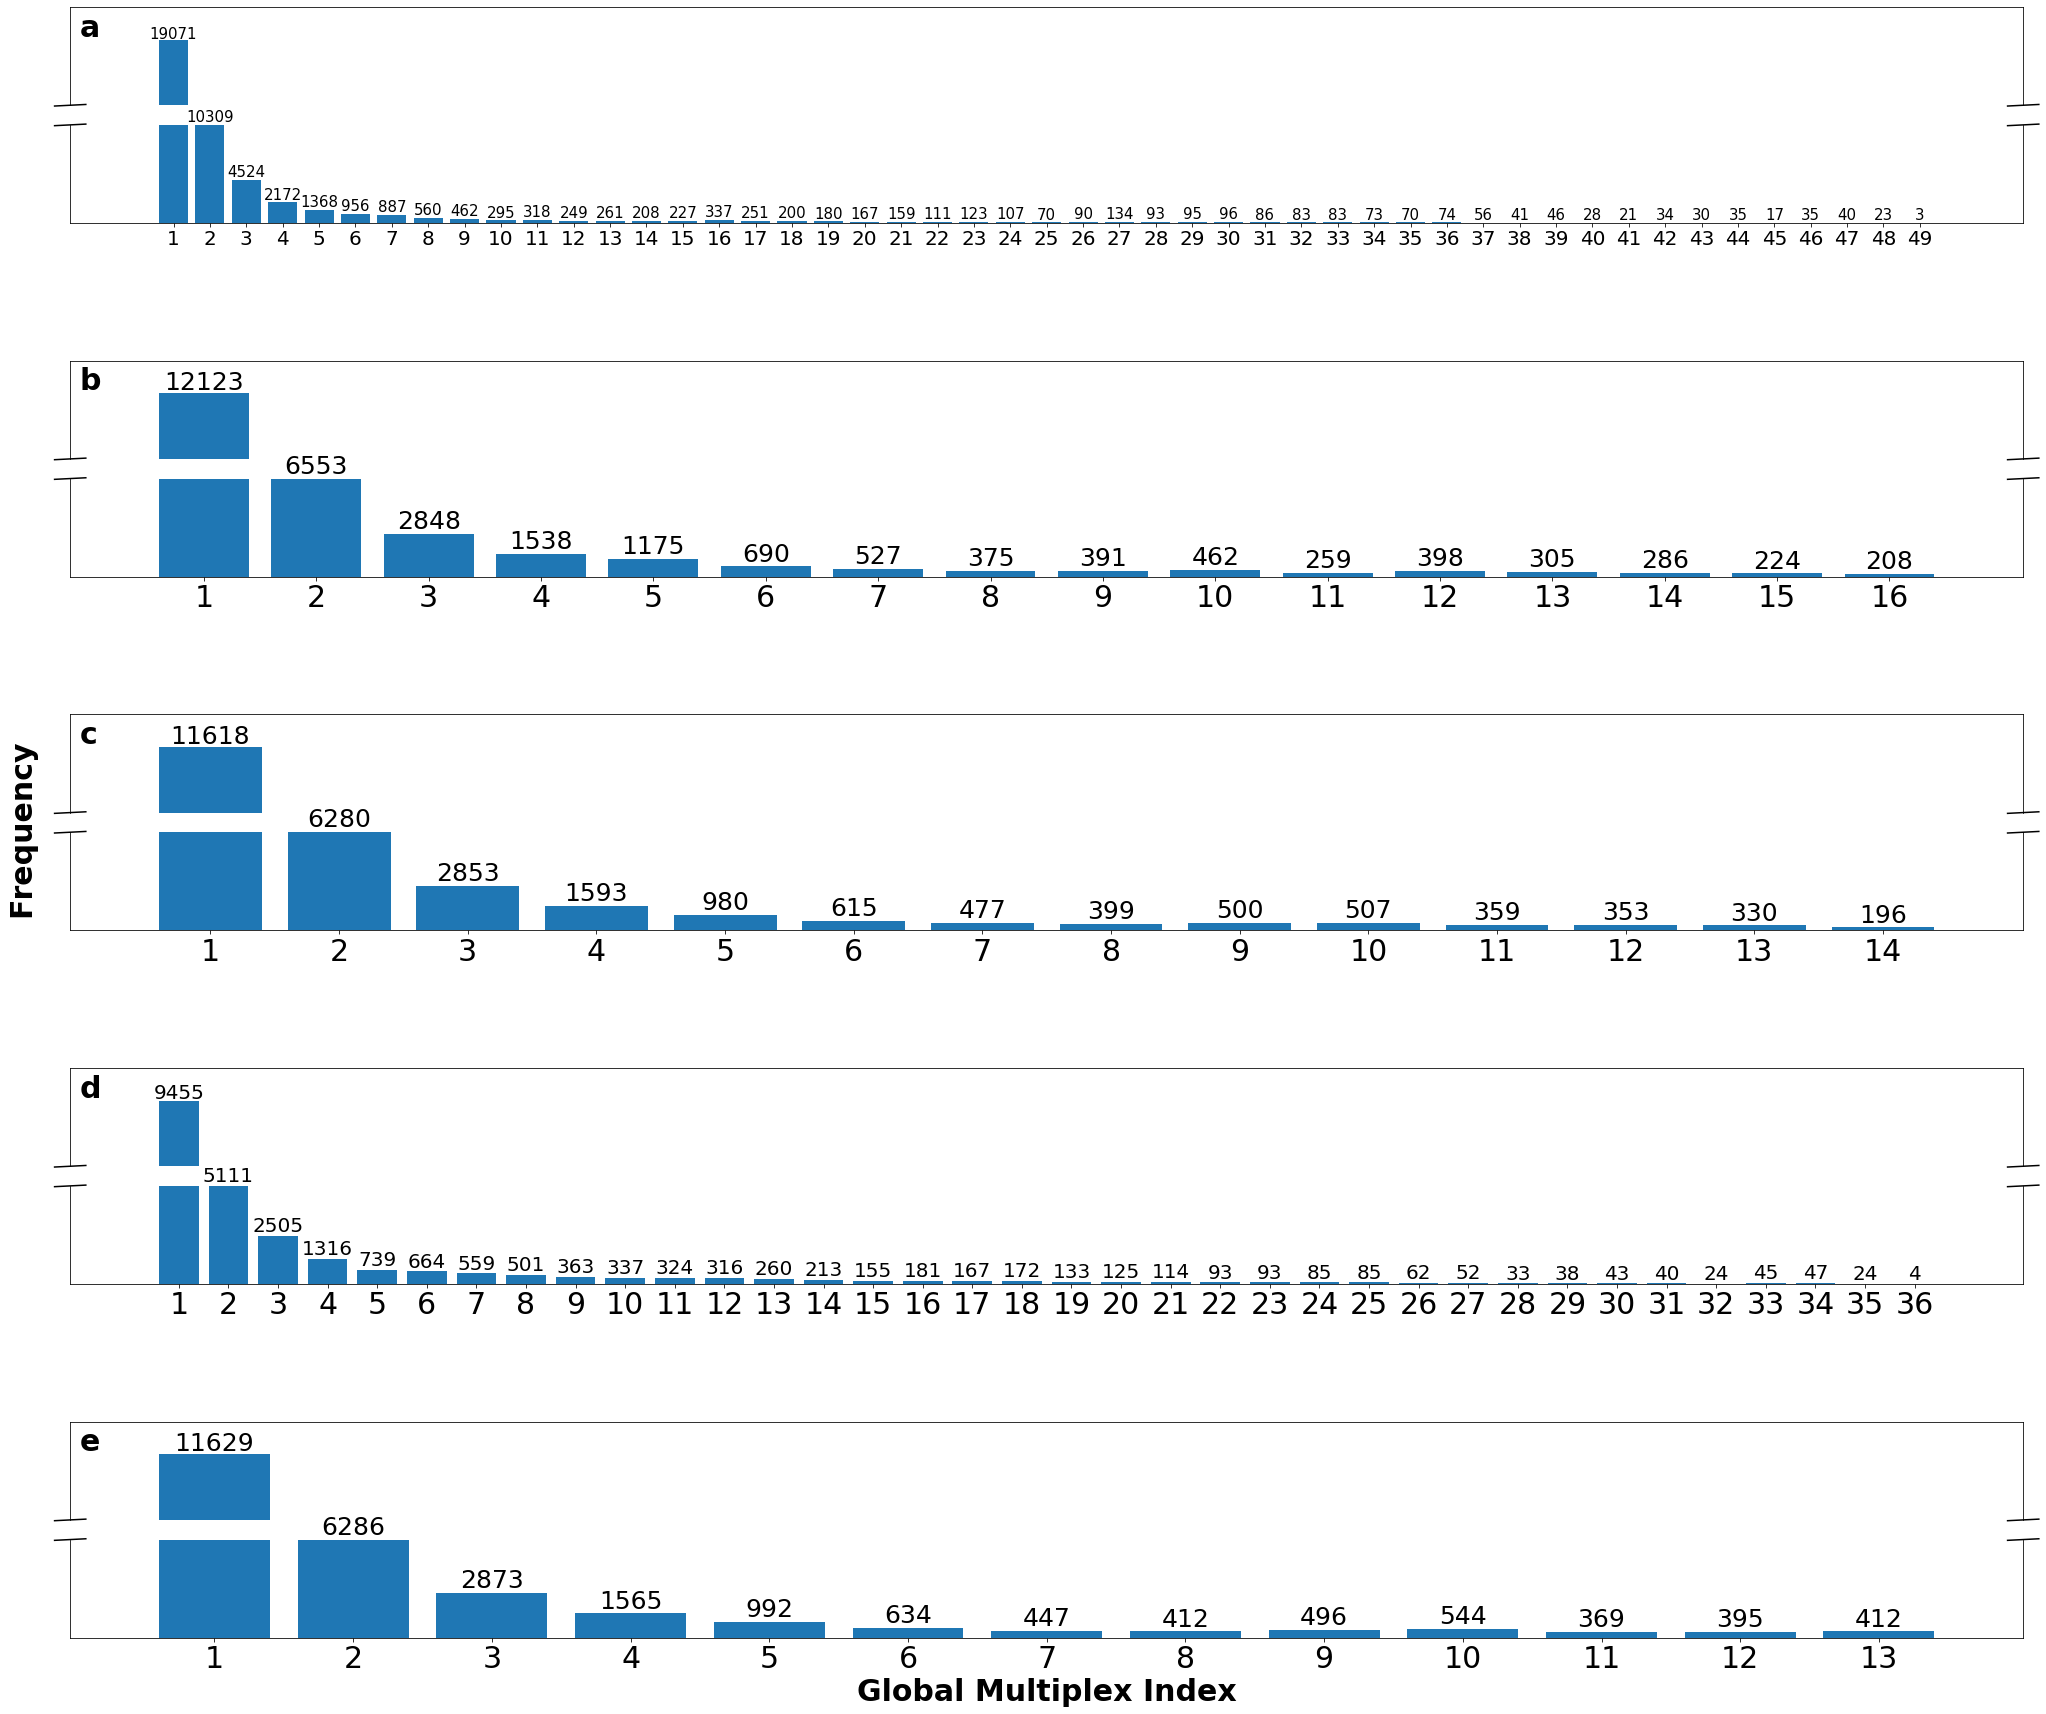

In [69]:
f = plt.figure(constrained_layout=False, figsize=(35, 30))
gs = f.add_gridspec(14, 1)

labels = ['a', 'b', 'c', 'd', 'e']

for ind, i in enumerate([0, 3, 6, 9, 12]):
    unique_vals = np.unique(all_distributions[ind], return_counts=True)
    
    #if i == 0:
    #    figsize=(35, 5)
    #else:
    #    figsize=(25, 5)
    ax = f.add_subplot(gs[i, :])
    ax2 = f.add_subplot(gs[i+1, :], sharex=ax)
    #f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=figsize)


    bar1 = ax.bar(unique_vals[0], unique_vals[1])
    bar2 = ax2.bar(unique_vals[0], unique_vals[1])

    ax.set_ylim(unique_vals[1].max() - 100, unique_vals[1].max() + 50)  # outliers only
    ax2.set_ylim(0, unique_vals[1][1])  # most of the data

    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    #ax.set_xticks([])
    #ax.xaxis.tick_top()
    #ax.set_xticks([], [])
    ax.tick_params(axis=u'both', which=u'both',length=0) # remove the ticks above
    #ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()
    ax2.set_xticks(unique_vals[0])
    ax2.set_yticks([])
    ax.set_yticks([])
    plt.setp(ax.get_xticklabels(), visible=False)
    
    #ax2.set_xticklabels(unique_vals[0], fontsize=20)
    tmp_size = 20 if ind == 0 else 30
    ax.tick_params(labelsize=tmp_size)
    ax2.tick_params(labelsize=tmp_size)
    
    ax.annotate(labels[ind], xy=(0.005, 0.7), xycoords="axes fraction", fontsize=30, weight = 'bold')
    
    #plt.ylabel('Tissue', size=35, fontweight='bold')
    #ax2.text(0.5, -0.05, 'Global Multiplexity Index', ha='center', size=25, fontweight='bold')
#f.text(0.1, 0.5, 'Frequency', va='center', rotation='vertical', size=25, fontweight='bold')
    #ax.set_xlabel('Community size', size=35, fontweight='bold')
    
    if ind == 0:
        tmp_size = 15
    elif ind == 3:
        tmp_size = 20
    else:
        tmp_size = 25
    count_i = 0
    for rect in bar1:
        if count_i == 0:
            count_i += 1
            height =  unique_vals[1][1] * 1.85
        else:
            height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size=tmp_size)

    d = .008  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    

    
plt.xlabel('Global Multiplex Index', size=30, fontweight='bold')
#plt.set_ylabel('Frequency', size=30, fontweight='bold')
f.text(0.1, 0.5, 'Frequency', va='center', rotation='vertical', size=30, fontweight='bold')
#plt.tight_layout()
plt.savefig(f'figures/multiplex_hist_allcases.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()
plt.close()

In [53]:
np.unique(all_distributions[4], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([23976,  6286,  2873,  1565,   992,   634,   447,   412,   496,
          544,   369,   395,   412]))

## UMAP only on Whole Blood

In [18]:
demo_data = pd.read_csv("meta_data/GTEx_Analysis_2017-06-05_v8_Annotations_SubjectPhenotypesDS.txt", sep='\t')
demo_data = demo_data.set_index('SUBJID')
demo_data

,COHORT,SEX,AGE,RACE,ETHNCTY,HGHT,HGHTU,WGHT,WGHTU,BMI,...,MHTXCEXP,MHUK8096,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME
SUBJID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F,Postmortem,2,66,2,0,66.00,in,199.0,lb,32.12,...,0,0,0,0,0,0,0,0,Spring,20:20
GTEX-111CU,Organ Donor (OPO),1,57,3,0,70.00,in,234.0,lb,33.57,...,0,0,0,0,0,0,0,0,Spring,08:01
GTEX-111FC,Postmortem,1,61,3,0,73.00,in,190.0,lb,25.06,...,0,0,0,0,0,0,0,0,Spring,12:30
GTEX-111VG,Postmortem,1,63,3,0,69.00,in,200.0,lb,29.53,...,0,0,0,0,0,0,0,0,Spring,07:13
GTEX-111YS,Organ Donor (OPO),1,62,3,0,72.00,in,227.0,lb,30.78,...,0,0,0,0,0,0,0,0,Spring,01:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYW4,Postmortem,1,66,1,99,61.00,in,149.6,lb,28.26,...,0,0,0,0,0,0,0,0,Spring,00:54
GTEX-ZYY3,Postmortem,2,67,3,99,58.67,in,103.4,lb,21.12,...,0,0,0,0,0,0,0,0,Spring,21:46
GTEX-ZZ64,Organ Donor (OPO),1,24,3,0,65.00,in,158.0,lb,26.29,...,0,0,0,0,0,0,0,0,Spring,01:56


In [11]:
filt_df = all_df.filter(like='Whole_Blood', axis=0)
filt_df

,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,C1orf159,TTLL10,...,DEFA1,OR52K2,OR52K1,OR52M1,C11orf40,OR51G2,OR51B6,OR51M1,OR52B2,tissue
GTEX-111YS_Whole_Blood,0.0,0.641743,0.467202,0.416674,0.427059,0.514966,0.442867,0.417689,0.457915,0.0,...,0.634523,0.657089,0.585087,0.925440,0.814827,0.582888,0.442938,0.851452,0.338044,_Whole_Blood
GTEX-1122O_Whole_Blood,0.0,0.620759,0.410389,0.362110,0.502275,0.708493,0.549285,0.519232,0.458215,0.0,...,0.653604,0.643271,0.263598,0.585593,0.367561,0.398415,0.367749,0.487455,0.866775,_Whole_Blood
GTEX-1128S_Whole_Blood,0.0,0.572544,0.426015,0.564164,0.565653,0.457484,0.329851,0.438163,0.434110,0.0,...,0.335770,0.518056,0.526863,0.220001,0.574993,0.498635,0.587474,0.447579,0.440297,_Whole_Blood
GTEX-113IC_Whole_Blood,0.0,0.557270,0.325662,0.627688,0.634949,0.630846,0.430588,0.589508,0.490931,0.0,...,0.299104,0.474842,0.453171,0.680833,0.521548,0.388624,0.365844,0.546870,0.390698,_Whole_Blood
GTEX-113JC_Whole_Blood,0.0,0.606508,0.517860,0.604418,0.589938,0.604853,0.476993,0.679760,0.562375,0.0,...,0.277126,0.782666,0.630993,0.598498,0.747312,0.518773,0.657476,0.754069,0.558124,_Whole_Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZVT4_Whole_Blood,0.0,0.631983,0.456394,0.884009,0.592465,0.336398,0.513292,0.293907,0.500981,0.0,...,0.683250,0.415071,0.500069,0.664753,0.551627,0.672737,0.438905,0.282964,0.331988,_Whole_Blood
GTEX-ZVZP_Whole_Blood,0.0,0.647150,0.465894,0.601404,0.459806,0.442488,0.409213,0.451304,0.506114,0.0,...,0.239318,0.230977,0.600097,0.605753,0.921985,0.609646,0.340887,0.702235,0.468409,_Whole_Blood
GTEX-ZVZQ_Whole_Blood,0.0,0.499150,0.394953,0.534016,0.483245,0.472065,0.387593,0.374437,0.573661,0.0,...,0.467167,0.327454,0.505719,0.561168,0.645791,0.661015,0.438458,0.575850,0.432600,_Whole_Blood
GTEX-ZXES_Whole_Blood,0.0,0.649094,0.436576,0.500311,0.463620,0.400218,0.497622,0.497969,0.389528,0.0,...,0.510744,0.175503,0.408802,0.616300,0.447692,0.453587,0.374269,0.635764,0.359208,_Whole_Blood


In [17]:
emb_2d = umap.UMAP(n_neighbors=5,
                   min_dist=0.25,
                  learning_rate=0.5,
                  spread=1,
                  random_state=1111).fit_transform(filt_df.drop(columns=['tissue']))

umap_embed = pd.DataFrame(emb_2d, columns=['1', '2'], index=filt_df.index)

In [21]:
umap_embed['ID'] = umap_embed.apply(lambda row: row.name.split('_')[0], axis=1)

umap_embed

,1,2,ID
GTEX-111YS_Whole_Blood,7.397897,9.712297,GTEX-111YS
GTEX-1122O_Whole_Blood,4.493773,8.039818,GTEX-1122O
GTEX-1128S_Whole_Blood,8.652105,9.105925,GTEX-1128S
GTEX-113IC_Whole_Blood,6.610968,10.728096,GTEX-113IC
GTEX-113JC_Whole_Blood,6.114828,5.849978,GTEX-113JC
...,...,...,...
GTEX-ZVT4_Whole_Blood,5.406089,6.388817,GTEX-ZVT4
GTEX-ZVZP_Whole_Blood,6.406690,7.813601,GTEX-ZVZP
GTEX-ZVZQ_Whole_Blood,5.107584,8.644519,GTEX-ZVZQ
GTEX-ZXES_Whole_Blood,6.167314,10.717595,GTEX-ZXES


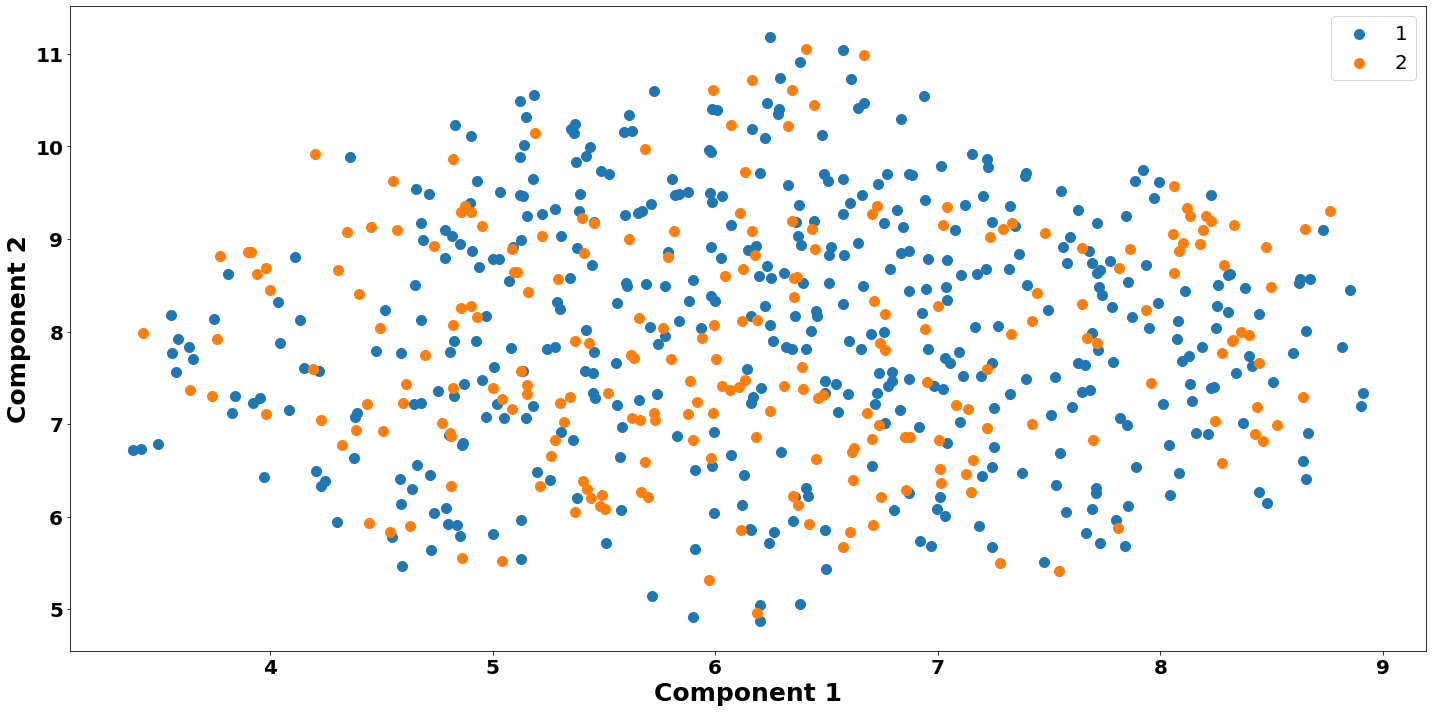

In [45]:
plt.figure(figsize=(20,10))

tmp_embed = umap_embed.join(demo_data.loc[:, 'SEX'], on='ID', how='inner')
for sex_id in [1, 2]:
    plt.scatter(tmp_embed.loc[tmp_embed.SEX == sex_id, '1'], 
                tmp_embed.loc[tmp_embed.SEX == sex_id, '2'], 
                s=100, label=sex_id)
    
plt.xlabel('Component 1', fontweight='bold', size=25)
plt.xticks(fontweight='bold', size=20)
plt.yticks(fontweight='bold', size=20)
plt.ylabel('Component 2', fontweight='bold', size=25)

plt.tight_layout()
plt.legend(fontsize=20)
plt.show()
plt.close()

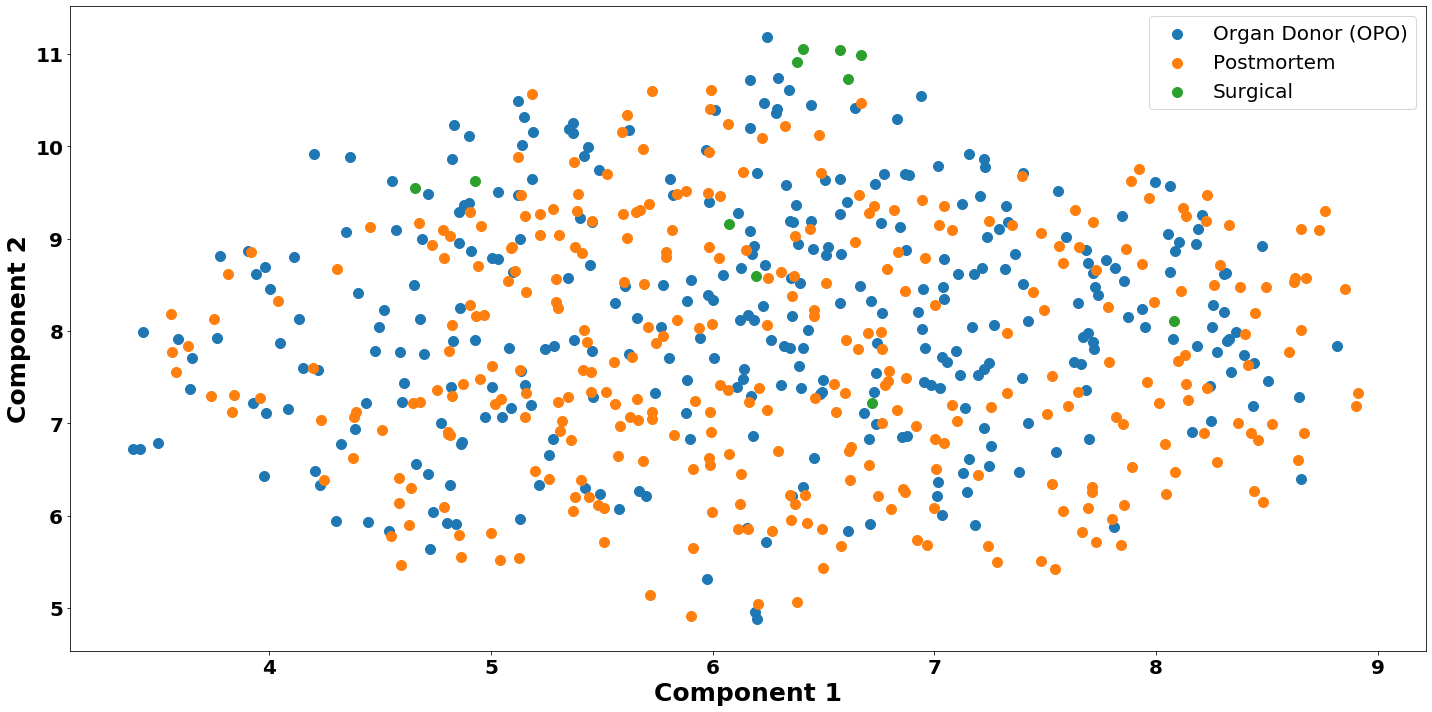

In [46]:
plt.figure(figsize=(20,10))

tmp_embed = umap_embed.join(demo_data.loc[:, 'COHORT'], on='ID', how='inner')
for pheno_id in ['Organ Donor (OPO)', 'Postmortem', 'Surgical']:
    plt.scatter(tmp_embed.loc[tmp_embed.COHORT == pheno_id, '1'], 
                tmp_embed.loc[tmp_embed.COHORT == pheno_id, '2'], 
                s=100, label=pheno_id)
    
plt.xlabel('Component 1', fontweight='bold', size=25)
plt.xticks(fontweight='bold', size=20)
plt.yticks(fontweight='bold', size=20)
plt.ylabel('Component 2', fontweight='bold', size=25)

plt.tight_layout()
plt.legend(fontsize=20)
plt.savefig("figures/umap_wholeblood_cohort.pdf")
plt.show()
plt.close()

In [48]:
tmp_umap_embed = umap_embed.join(demo_data.loc[:, 'AGE'], on='ID', how='inner')
tmp_umap_embed['AGE'] = pd.qcut(tmp_umap_embed['AGE'], 7)

In [39]:
for i in tmp_umap_embed['AGE'].unique():
    print(i)

(61.0, 66.0]
(52.0, 57.0]
(57.0, 61.0]
(66.0, 70.0]
(19.999, 34.0]
(47.0, 52.0]
(34.0, 47.0]


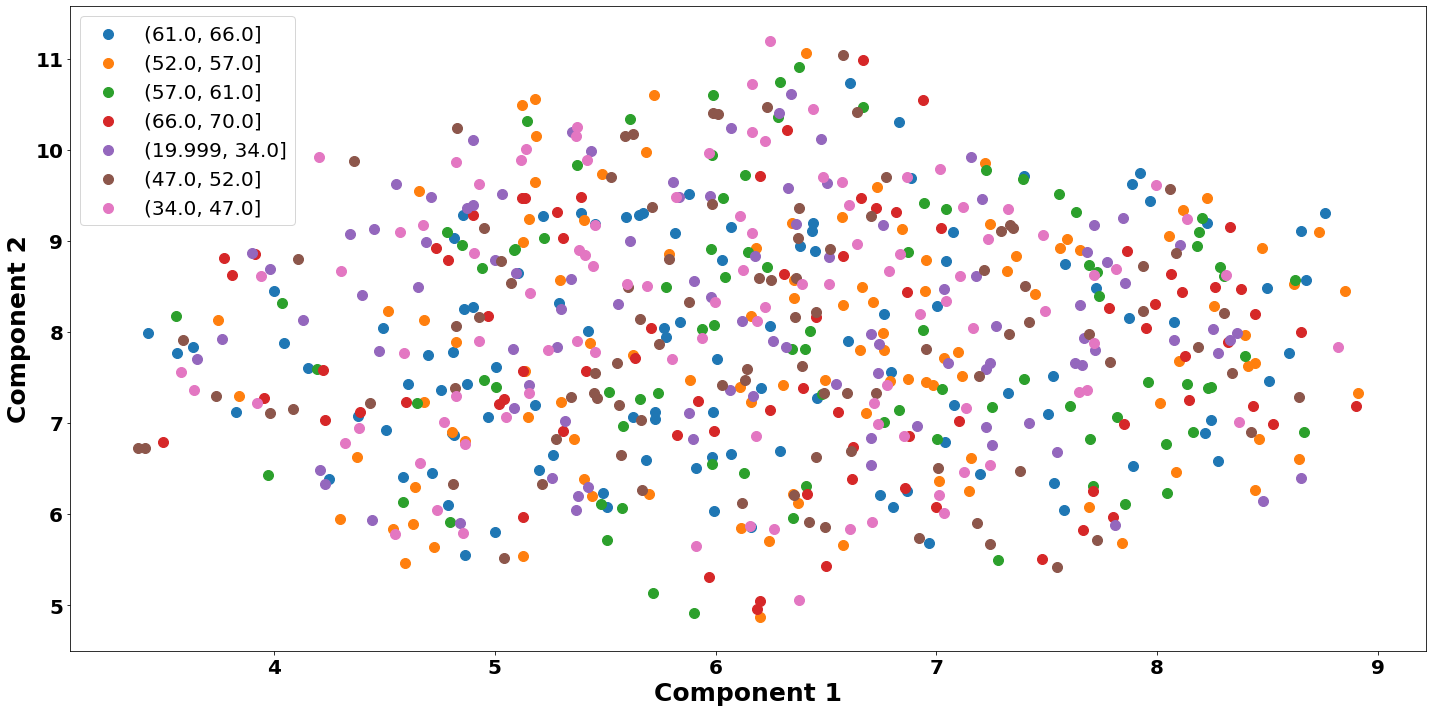

In [49]:
plt.figure(figsize=(20,10))

for pheno_id in tmp_umap_embed['AGE'].unique():
    plt.scatter(tmp_umap_embed.loc[tmp_umap_embed.AGE == pheno_id, '1'], 
                tmp_umap_embed.loc[tmp_umap_embed.AGE == pheno_id, '2'], 
                s=100, label=pheno_id)
    
plt.xlabel('Component 1', fontweight='bold', size=25)
plt.xticks(fontweight='bold', size=20)
plt.yticks(fontweight='bold', size=20)
plt.ylabel('Component 2', fontweight='bold', size=25)

plt.tight_layout()
plt.legend(fontsize=20)
plt.show()
plt.close()

In [51]:
tmp_umap_embed = umap_embed.join(demo_data.loc[:, 'BMI'], on='ID', how='inner')
tmp_umap_embed['BMI'] = pd.qcut(tmp_umap_embed['BMI'], 7)

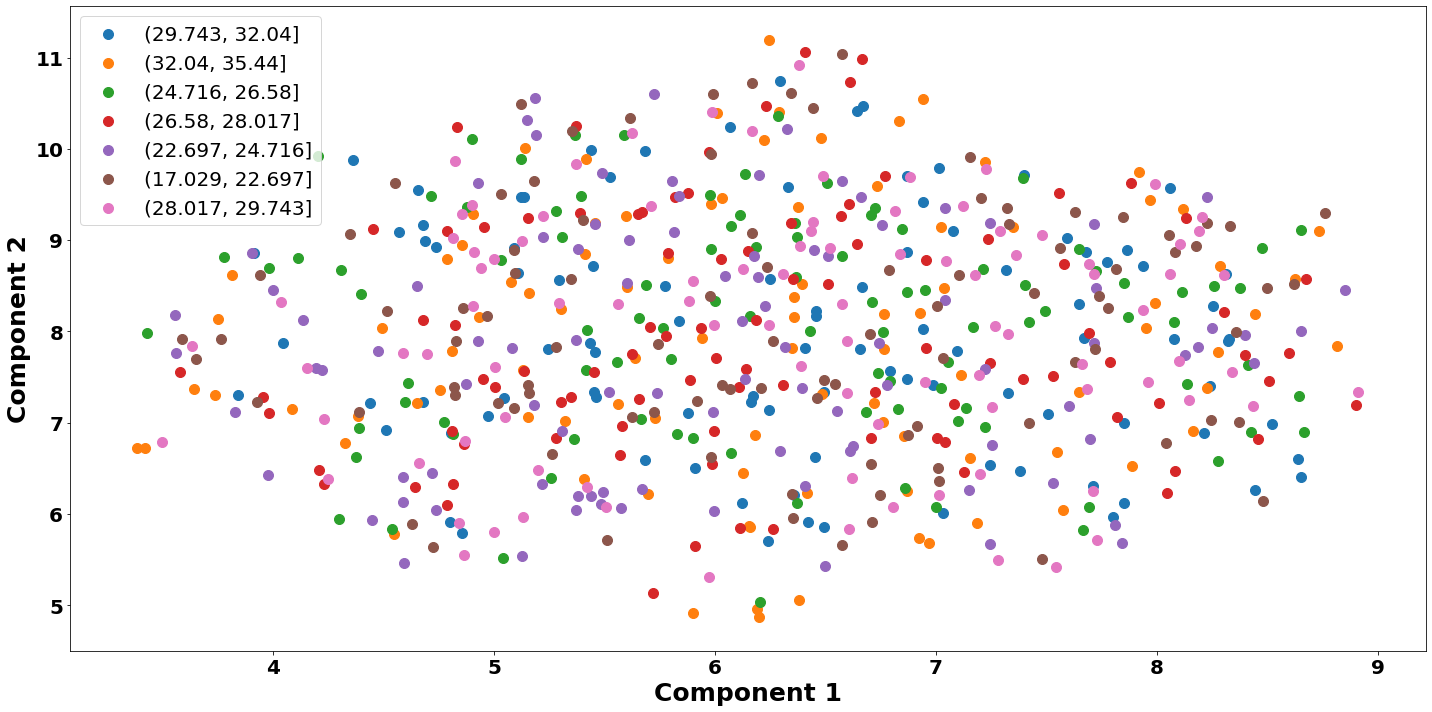

In [52]:
plt.figure(figsize=(20,10))

for pheno_id in tmp_umap_embed['BMI'].unique():
    plt.scatter(tmp_umap_embed.loc[tmp_umap_embed.BMI == pheno_id, '1'], 
                tmp_umap_embed.loc[tmp_umap_embed.BMI == pheno_id, '2'], 
                s=100, label=pheno_id)
    
plt.xlabel('Component 1', fontweight='bold', size=25)
plt.xticks(fontweight='bold', size=20)
plt.yticks(fontweight='bold', size=20)
plt.ylabel('Component 2', fontweight='bold', size=25)

plt.tight_layout()
plt.legend(fontsize=20)
plt.savefig("figures/umap_wholeblood_bmi.pdf")
plt.show()
plt.close()